## Step 1

#### Framing the problem
1. **Descriptive** - "seeks to summarize a characteristic of a set of data"
2. **Exploratory** - "analyze the data to see if there are patterns, trends, or relationships between variables" (hypothesis generating) 
3. **Inferential** - "a restatement of this proposed hypothesis as a question and would be answered by analyzing a different set of data" (hypothesis testing)
4. **Predictive** - "determine the impact on one factor based on other factor in a population - to make a prediction"
5. **Causal** - "asks whether changing one factor will change another factor in a population - to establish a causal link" 
6. **Mechanistic** - "establish *how* the change in one factor results in change in another factor in a population - to determine the exact mechanism"

## Step 2

### 2. Acquiring and Refining the Data


#### Finding Data Sources

Use the most official resources for collecting the data. Sometimes it might be necessary to use more than one source. In such scenarios, merging them into one single set of columns and using the same units of measurements might pose a challenge and have to be dealt with carefully. 


#### Scraping the Data

Sometime, the only way to acquire the data is to scrape it. Please make sure that you do violate the TOS when implementing this step.  


#### Refining the Data

> "Data acquired is usually is messy"

We will be performing the following operation on most of our datasets to refine it
- **Remove** e.g. remove redundant data from the data frame
- **Derive** e.g. State and City from the market field
- **Parse** e.g. extract date from year and month column

Other stuff you may need to do to refine are...
- **Missing** e.g. Check for missing or incomplete data
- **Quality** e.g. Check for duplicates, accuracy, unusual data
- **Convert** e.g. free text to coded value
- **Calculate** e.g. percentages, proportion
- **Merge** e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** e.g. show summary stats like mean


For brevity, the dataset we will be using in this scenario is this file "MonthWiseMarketArrivals_Clean.csv'". The refining step has been already performed on the dataset

# 4. Explore the Data


We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have.

In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import sys
import os

import pandas as pd
import numpy as np

# TSA from Statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=2, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Read the csv file
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

### Understand Data Structure and Types

In [6]:
df.shape

(10227, 10)

In [7]:
df.head(4)

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011

In [8]:
# Get the type of each column
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [9]:
# the date columns is being read as an object and not a Time-Interval object. So we need to convert it

df.date = pd.DatetimeIndex(df.date)


In [12]:
df.date.dtype

dtype('<M8[ns]')

In [14]:
# Make a backup copy of the dataframe

df_tmp = df.copy(

In [27]:
df = df_tmp.copy()

In [28]:
# Group by using city and sum on only the quantity field and specifying the index as false
df_city = df.groupby(['city'], as_index=False).quantity.sum()

In [32]:
df_city.head(10)

city  quantity
0      ABOHAR     82657
1        AGRA   6153607
2   AHMEDABAD  10462341
3  AHMEDNAGAR  13984622
4       AJMER     94304
5     ALIGARH    162430
6       ALWAR   3485162
7    AMRITSAR   1580169
8      BALLIA     23680
9   BANGALORE  76491944

In [37]:
df_city_sort = df_city.sort_values(by = "quantity", ascending = False)

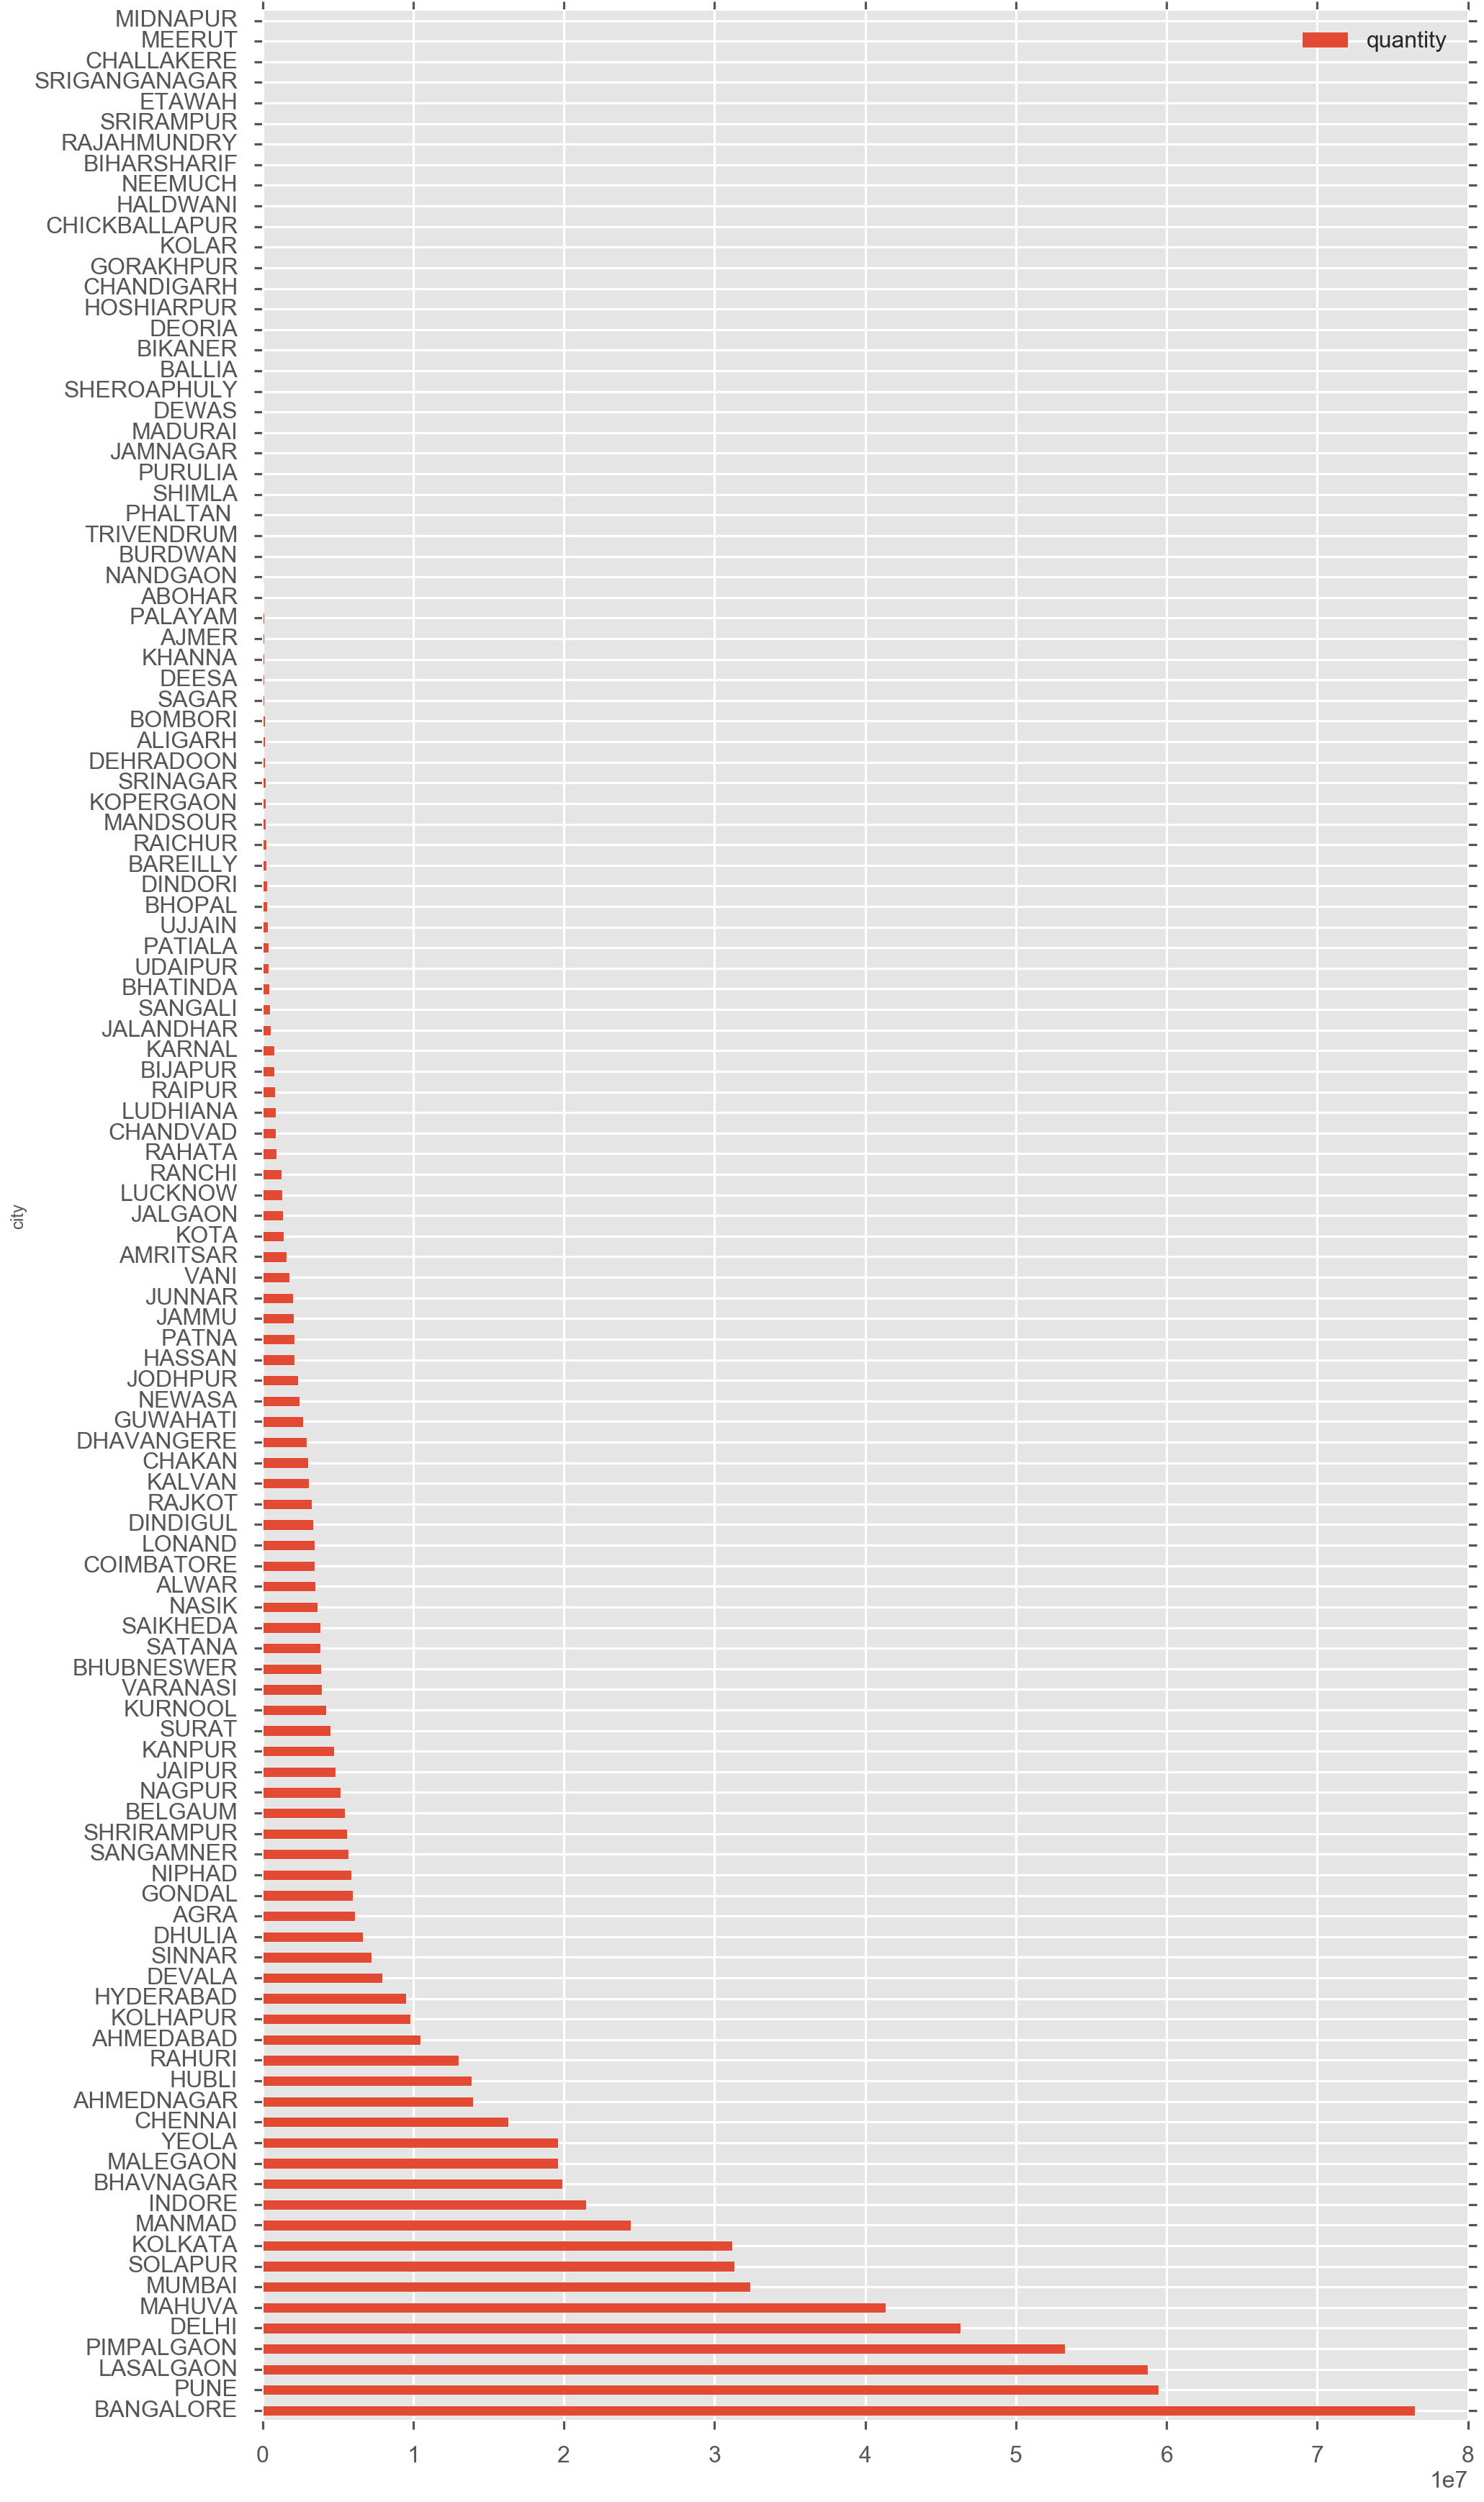

In [42]:
# Plot the Data
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 30)
df_city_sort.plot(kind ="barh", x = 'city', y = 'quantity')

### Check the  variation in  prices in Pune over the years?

In [73]:
dfPune = df[df.city == 'PUNE']

In [75]:
dfPune.tail(6)

market     month  year  quantity  priceMin  priceMax  priceMod state  \
7998  PUNE(MS)  December  2010    197847      2130      4694      3398    MS   
7999  PUNE(MS)  December  2011    307348       402       921       669    MS   
8000  PUNE(MS)  December  2012    169007       648      1755      1200    MS   
8001  PUNE(MS)  December  2013    344280       683      1800      1223    MS   
8002  PUNE(MS)  December  2014    366267       677      2146      1412    MS   
8003  PUNE(MS)  December  2015    273354       596      1965      1624    MS   

      city       date  
7998  PUNE 2010-12-01  
7999  PUNE 2011-12-01  
8000  PUNE 2012-12-01  
8001  PUNE 2013-12-01  
8002  PUNE 2014-12-01  
8003  PUNE 2015-12-01

In [70]:
#Summary
dfPune.describe()

year     quantity   priceMin   priceMax   priceMod
count  206.00000    206.00000  206.00000  206.00000  206.00000
mean  2007.08738 288692.08738  503.59709 1046.32524  812.60194
std      4.96644 117372.74086  389.63455  949.72740  746.39193
min   1999.00000  85015.00000  114.00000  217.00000  182.00000
25%   2003.00000 197925.00000  245.25000  470.25000  370.50000
50%   2007.00000 264455.50000  422.00000  717.50000  569.50000
75%   2011.00000 351954.50000  601.50000 1245.00000  947.00000
max   2016.00000 657744.00000 2761.00000 5175.00000 4714.00000

In [78]:
#Sorting the data by date so that we get a Time Series 

dfPune = dfPune.sort_values(by = "date")
dfPune.head(10)

market      month  year  quantity  priceMin  priceMax  priceMod state  \
7798  PUNE(MS)    January  1999    261782       313       648       502    MS   
7816  PUNE(MS)   February  1999    348353       238       379       321    MS   
7834  PUNE(MS)      March  1999    353155       245       333       292    MS   
7851  PUNE(MS)      April  1999    390826       252       400       354    MS   
7868  PUNE(MS)        May  1999    403277       317       555       489    MS   
7885  PUNE(MS)       June  1999    324550       313       531       478    MS   
7902  PUNE(MS)       July  1999    193343       302       548       450    MS   
7919  PUNE(MS)     August  1999    218589       333       485       430    MS   
7936  PUNE(MS)  September  1999    202004       476       678       608    MS   
7953  PUNE(MS)    October  1999    252051       369       658       568    MS   

      city       date  
7798  PUNE 1999-01-01  
7816  PUNE 1999-02-01  
7834  PUNE 1999-03-01  
7851  PUNE 1999-04-01  
7868  PUNE 1999-05-01  
7885  PUNE 1999-06-01  
7902  PUNE 1999-07-01  
7919  PUNE 1999-08-01  
7936  PUNE 1999-09-01  
7953  PUNE 1999-10-01

In [82]:
# Set the Index for the Dataframe as date and since the data is spaced monthly, we can set it
dfPune.index = pd.PeriodIndex(dfPune.date, freq='M')
dfPune.head()

market     month  year  quantity  priceMin  priceMax  priceMod  \
1999-01  PUNE(MS)   January  1999    261782       313       648       502   
1999-02  PUNE(MS)  February  1999    348353       238       379       321   
1999-03  PUNE(MS)     March  1999    353155       245       333       292   
1999-04  PUNE(MS)     April  1999    390826       252       400       354   
1999-05  PUNE(MS)       May  1999    403277       317       555       489   

        state  city       date  
1999-01    MS  PUNE 1999-01-01  
1999-02    MS  PUNE 1999-02-01  
1999-03    MS  PUNE 1999-03-01  
1999-04    MS  PUNE 1999-04-01  
1999-05    MS  PUNE 1999-05-01

In [87]:
dfPune['priceDiff'] = dfPune['priceMax'] - dfPune['priceMin']

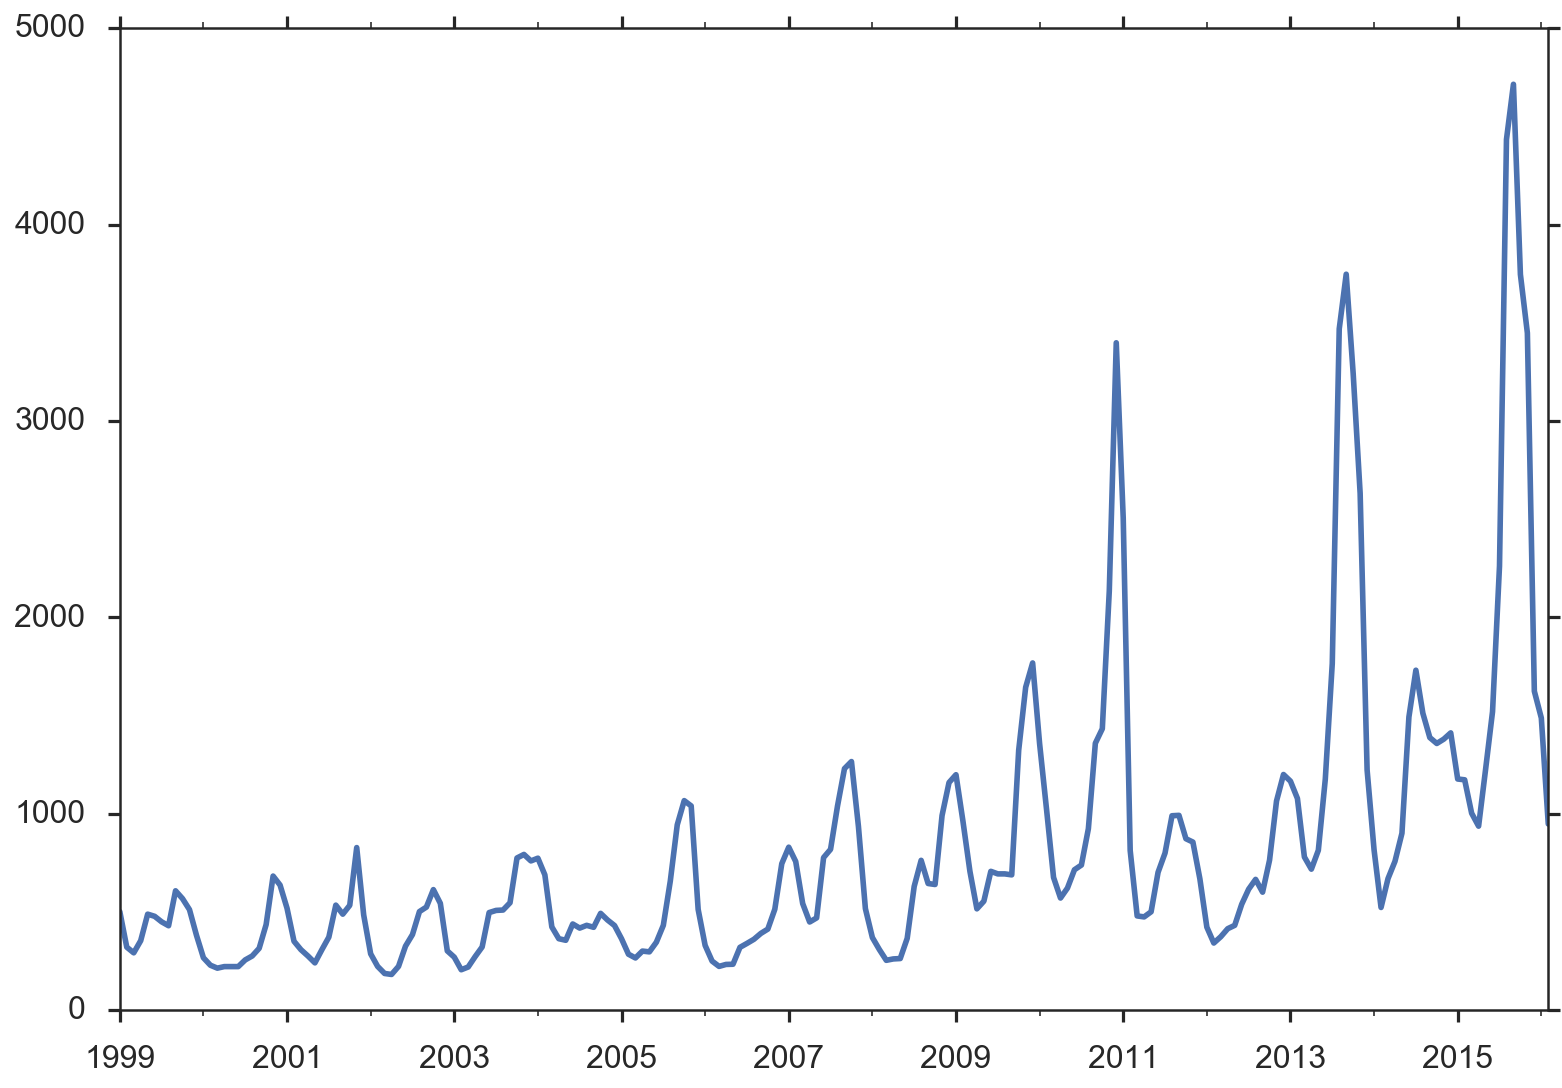

In [85]:
#A plot of modification of the price data
dfPune.priceMod.plot()

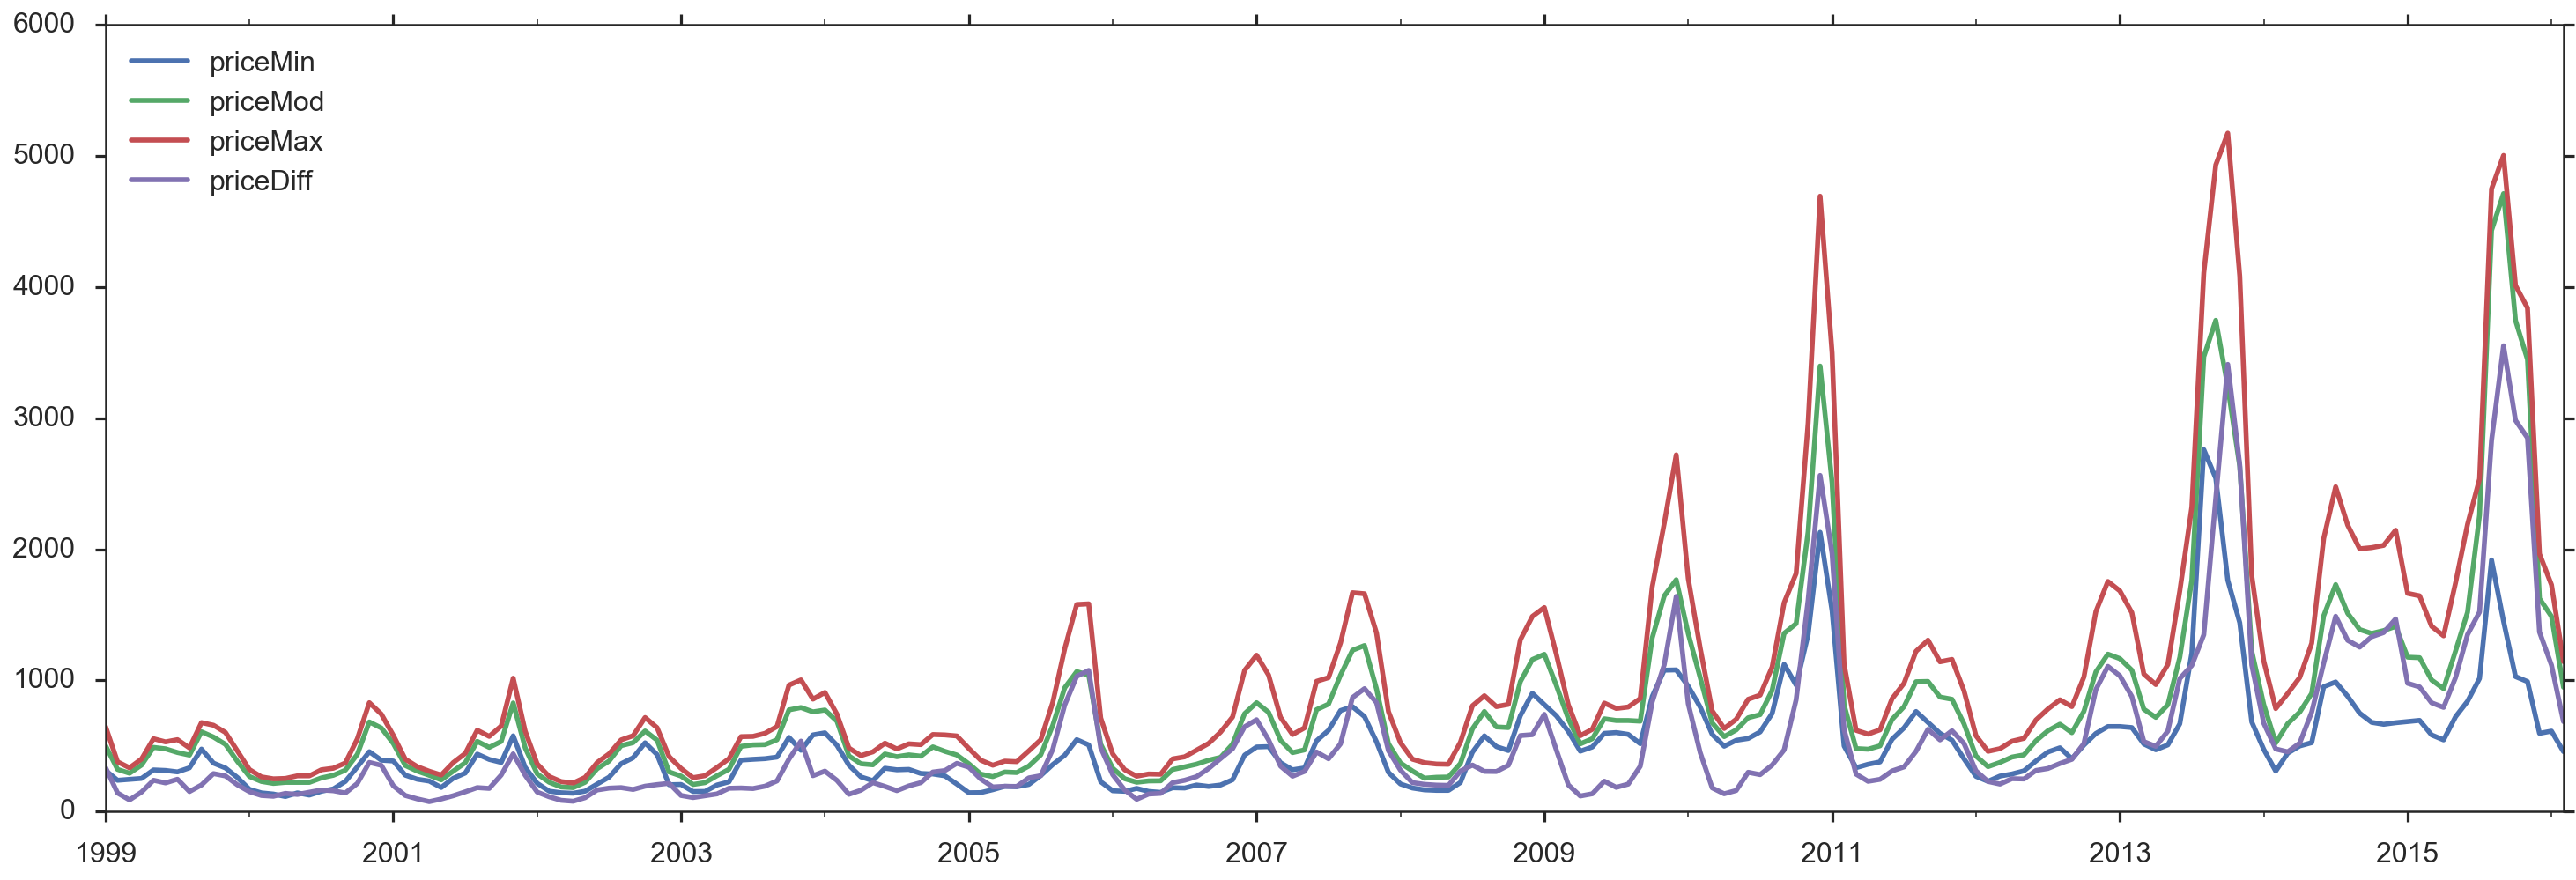

In [97]:
plt.rcParams['figure.figsize'] = (25, 8)
dfPune.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax', 'priceDiff'])


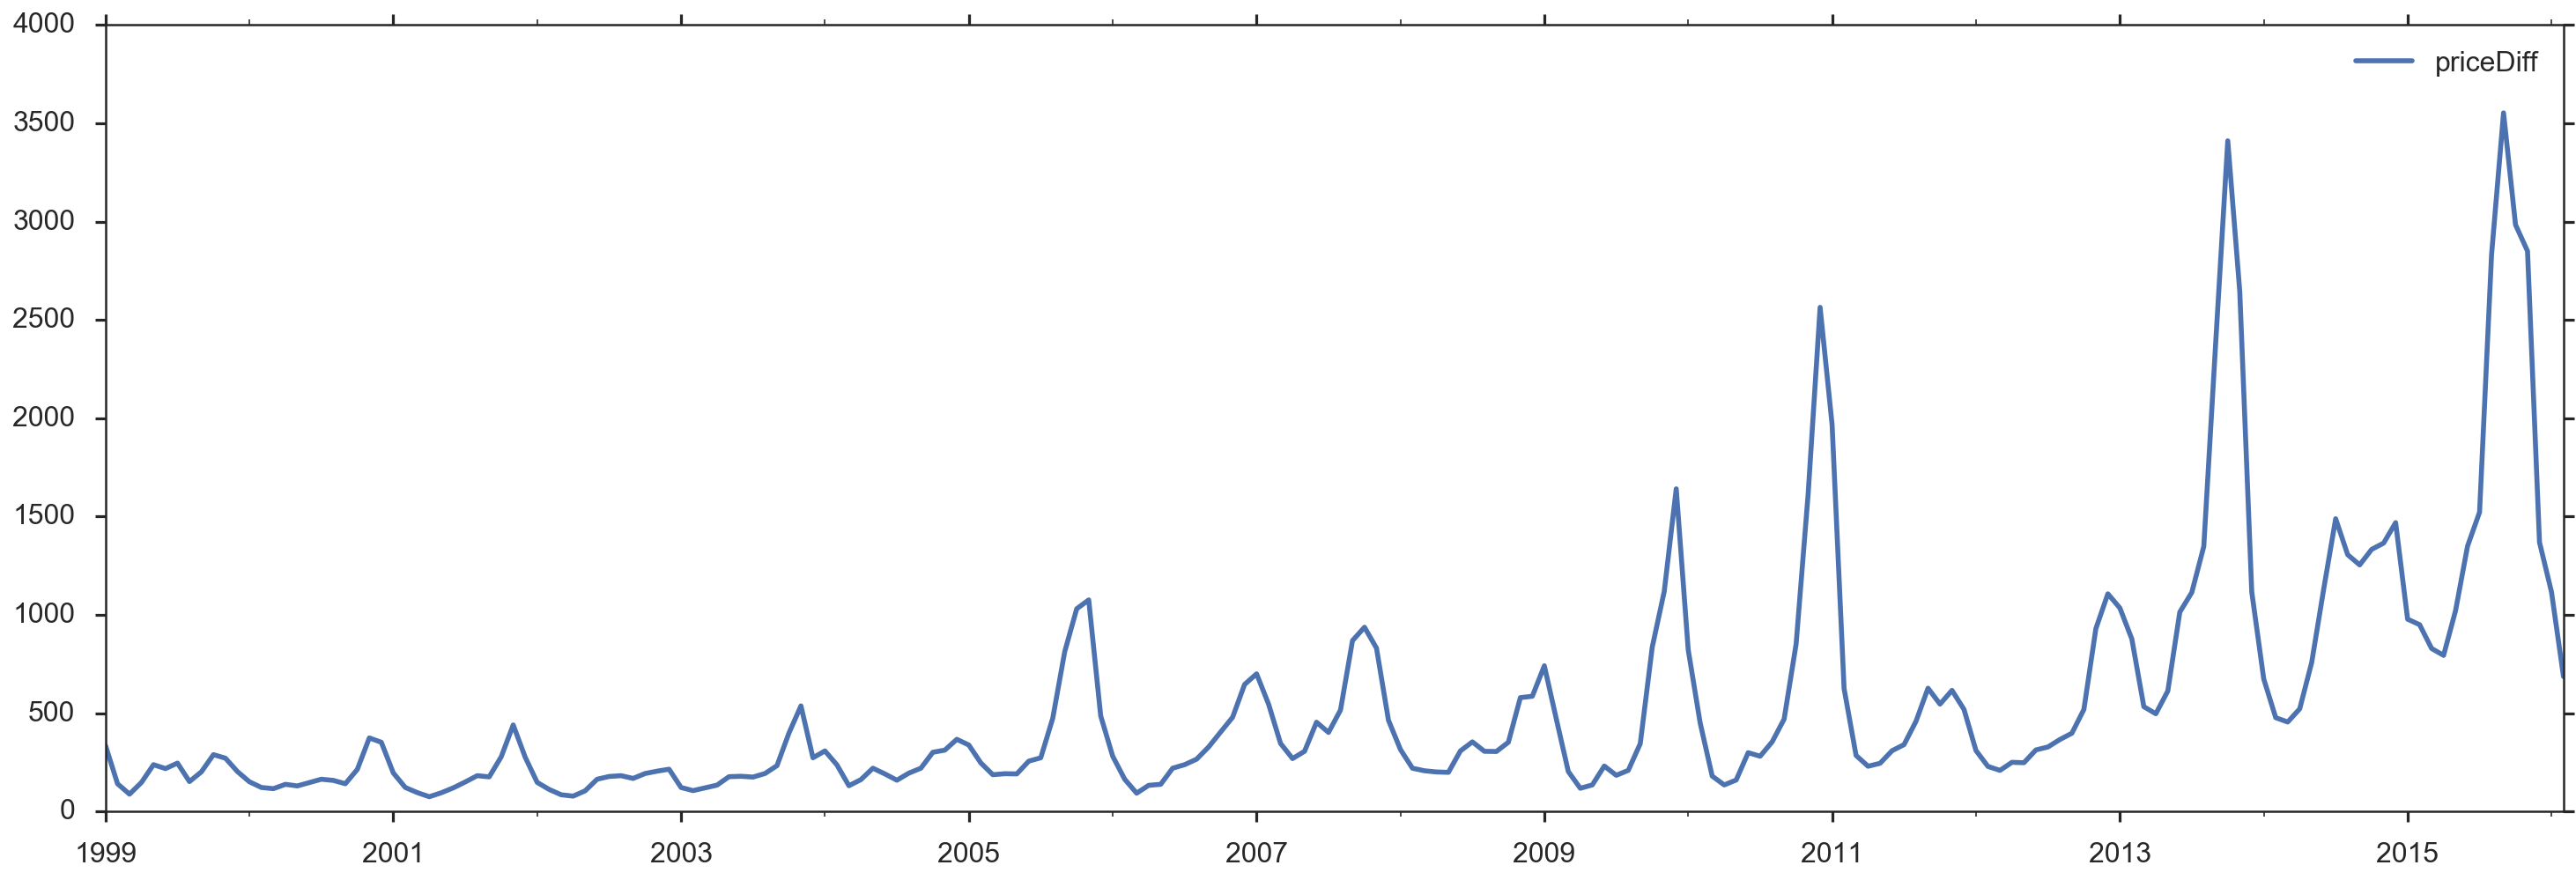

In [94]:
dfPune.plot(kind = 'line', y = 'priceDiff')

In [96]:
dfPune['monthVal'] = pd.DatetimeIndex(dfPune['date']).month
dfPune.head()

market     month  year  quantity  priceMin  priceMax  priceMod  \
1999-01  PUNE(MS)   January  1999    261782       313       648       502   
1999-02  PUNE(MS)  February  1999    348353       238       379       321   
1999-03  PUNE(MS)     March  1999    353155       245       333       292   
1999-04  PUNE(MS)     April  1999    390826       252       400       354   
1999-05  PUNE(MS)       May  1999    403277       317       555       489   

        state  city       date  priceDiff  monthVal  
1999-01    MS  PUNE 1999-01-01        335         1  
1999-02    MS  PUNE 1999-02-01        141         2  
1999-03    MS  PUNE 1999-03-01         88         3  
1999-04    MS  PUNE 1999-04-01        148         4  
1999-05    MS  PUNE 1999-05-01        238         5

###  Creating a Pivot table to examine the monthly changes 


In [100]:
dfPunePivot = pd.pivot_table(dfPune, values = "priceDiff", columns = "year", index = "monthVal")
dfPunePivot

year          1999      2000      2001      2002      2003      2004  \
monthVal                                                               
1        335.00000 151.00000 196.00000 148.00000 122.00000 308.00000   
2        141.00000 122.00000 122.00000 112.00000 106.00000 237.00000   
3         88.00000 116.00000  96.00000  85.00000 120.00000 131.00000   
4        148.00000 138.00000  75.00000  78.00000 134.00000 162.00000   
5        238.00000 130.00000  95.00000 105.00000 177.00000 220.00000   
6        218.00000 147.00000 120.00000 164.00000 179.00000 191.00000   
7        246.00000 164.00000 150.00000 178.00000 175.00000 159.00000   
8        152.00000 158.00000 182.00000 182.00000 193.00000 195.00000   
9        202.00000 141.00000 176.00000 168.00000 233.00000 220.00000   
10       289.00000 214.00000 278.00000 193.00000 399.00000 301.00000   
11       271.00000 374.00000 440.00000 205.00000 537.00000 312.00000   
12       203.00000 352.00000 276.00000 215.00000 273.00000 367.00000   

year           2005      2006      2007      2008       2009       2010  \
monthVal                                                                  
1         338.00000 281.00000 700.00000 315.00000  741.00000  822.00000   
2         247.00000 164.00000 546.00000 220.00000  470.00000  449.00000   
3         187.00000  93.00000 346.00000 207.00000  203.00000  180.00000   
4         192.00000 133.00000 269.00000 201.00000  118.00000  135.00000   
5         191.00000 138.00000 306.00000 199.00000  135.00000  160.00000   
6         256.00000 220.00000 454.00000 308.00000  231.00000  299.00000   
7         273.00000 238.00000 402.00000 354.00000  184.00000  281.00000   
8         474.00000 266.00000 516.00000 306.00000  209.00000  354.00000   
9         813.00000 328.00000 869.00000 305.00000  345.00000  470.00000   
10       1031.00000 404.00000 937.00000 352.00000  836.00000  852.00000   
11       1076.00000 479.00000 831.00000 579.00000 1119.00000 1613.00000   
12        486.00000 646.00000 464.00000 586.00000 1641.00000 2564.00000   

year           2011       2012       2013       2014       2015       2016  
monthVal                                                                    
1        1967.00000  310.00000 1035.00000  674.00000  978.00000 1116.00000  
2         625.00000  229.00000  877.00000  477.00000  950.00000  686.00000  
3         285.00000  209.00000  533.00000  455.00000  829.00000        nan  
4         230.00000  250.00000  497.00000  522.00000  794.00000        nan  
5         245.00000  248.00000  613.00000  758.00000 1022.00000        nan  
6         309.00000  313.00000 1014.00000 1131.00000 1350.00000        nan  
7         340.00000  328.00000 1114.00000 1489.00000 1522.00000        nan  
8         459.00000  366.00000 1348.00000 1306.00000 2831.00000        nan  
9         627.00000  398.00000 2391.00000 1254.00000 3553.00000        nan  
10        546.00000  519.00000 3411.00000 1333.00000 2984.00000        nan  
11        616.00000  930.00000 2645.00000 1365.00000 2850.00000        nan  
12        519.00000 1107.00000 1117.00000 1469.00000 1369.00000        nan

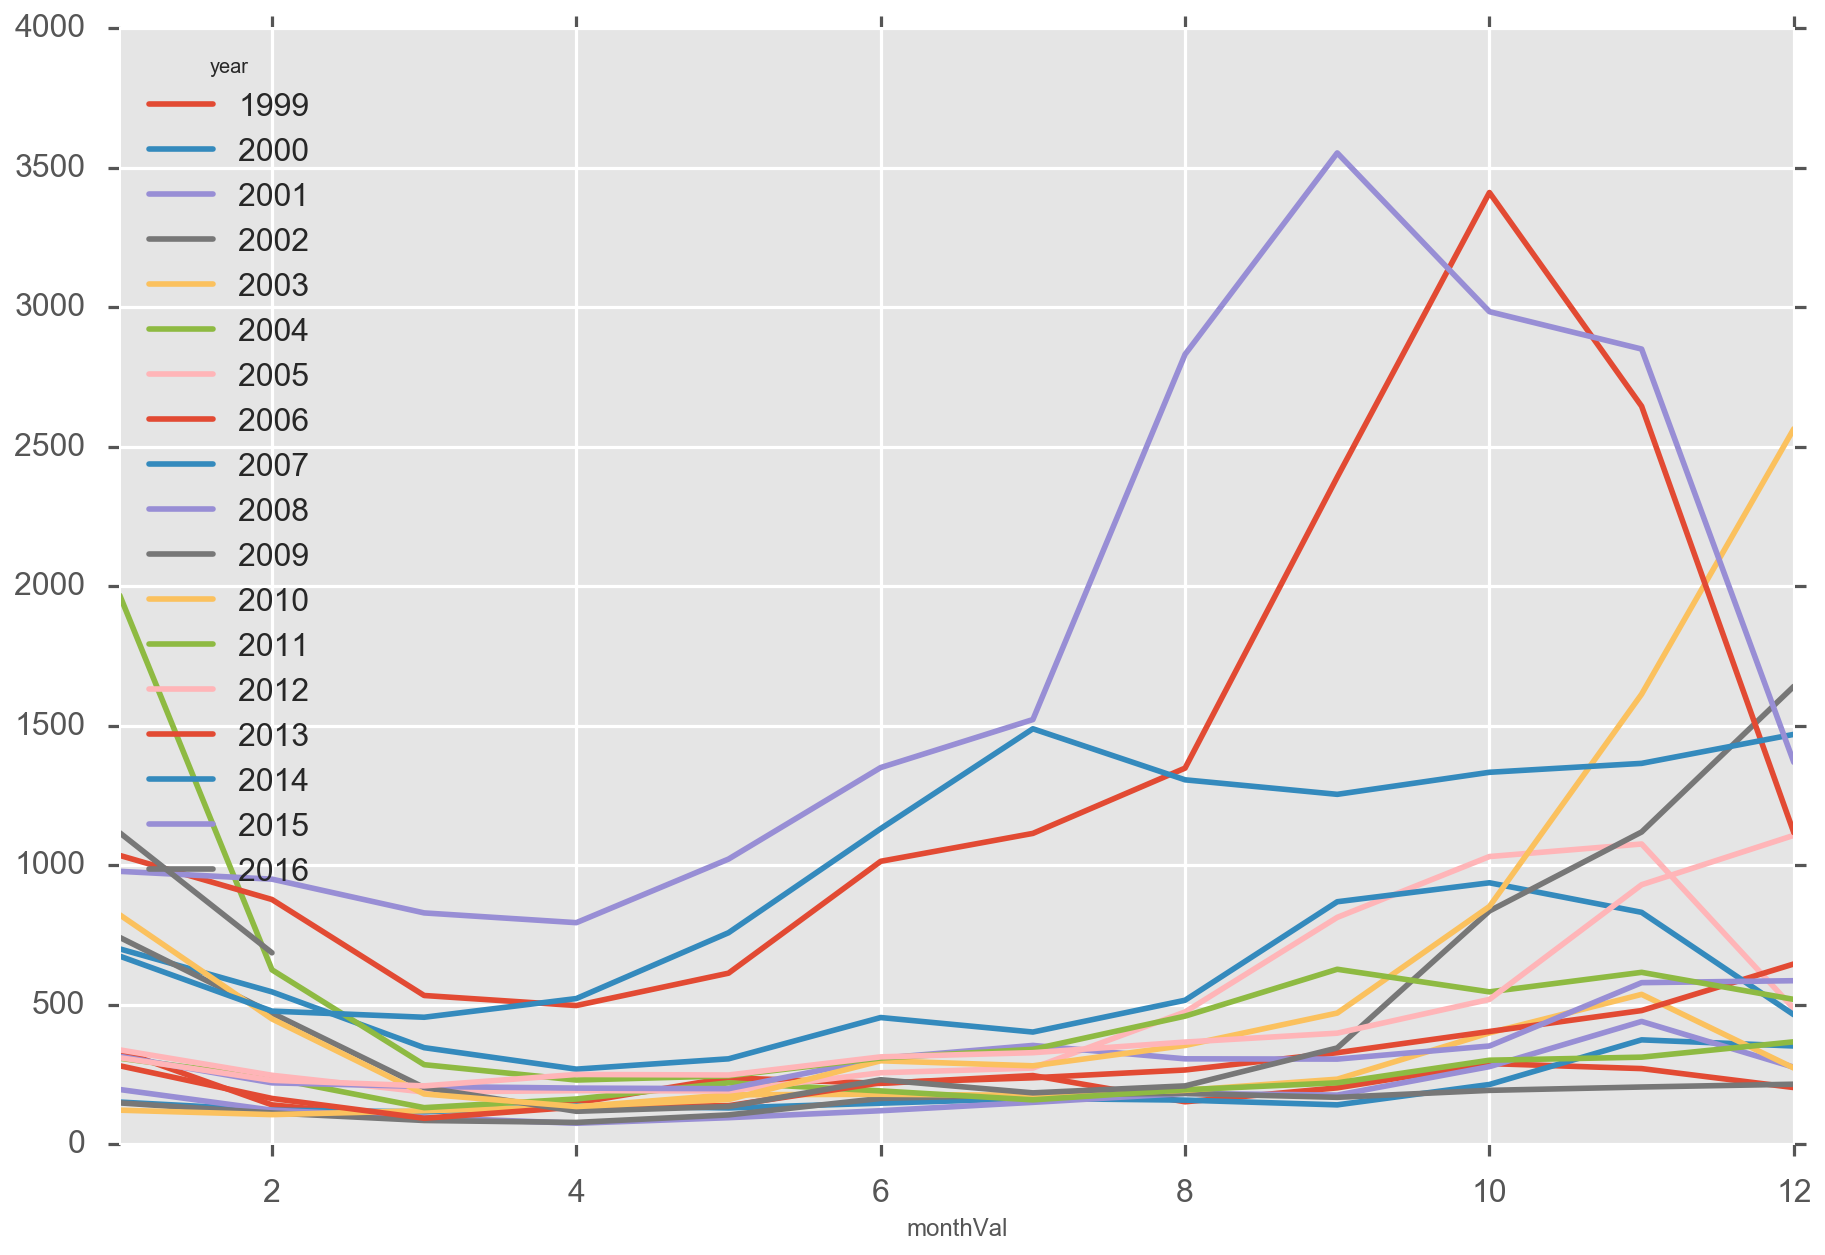

In [113]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
dfPunePivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000474D6BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000005C5725F8>]], dtype=object)

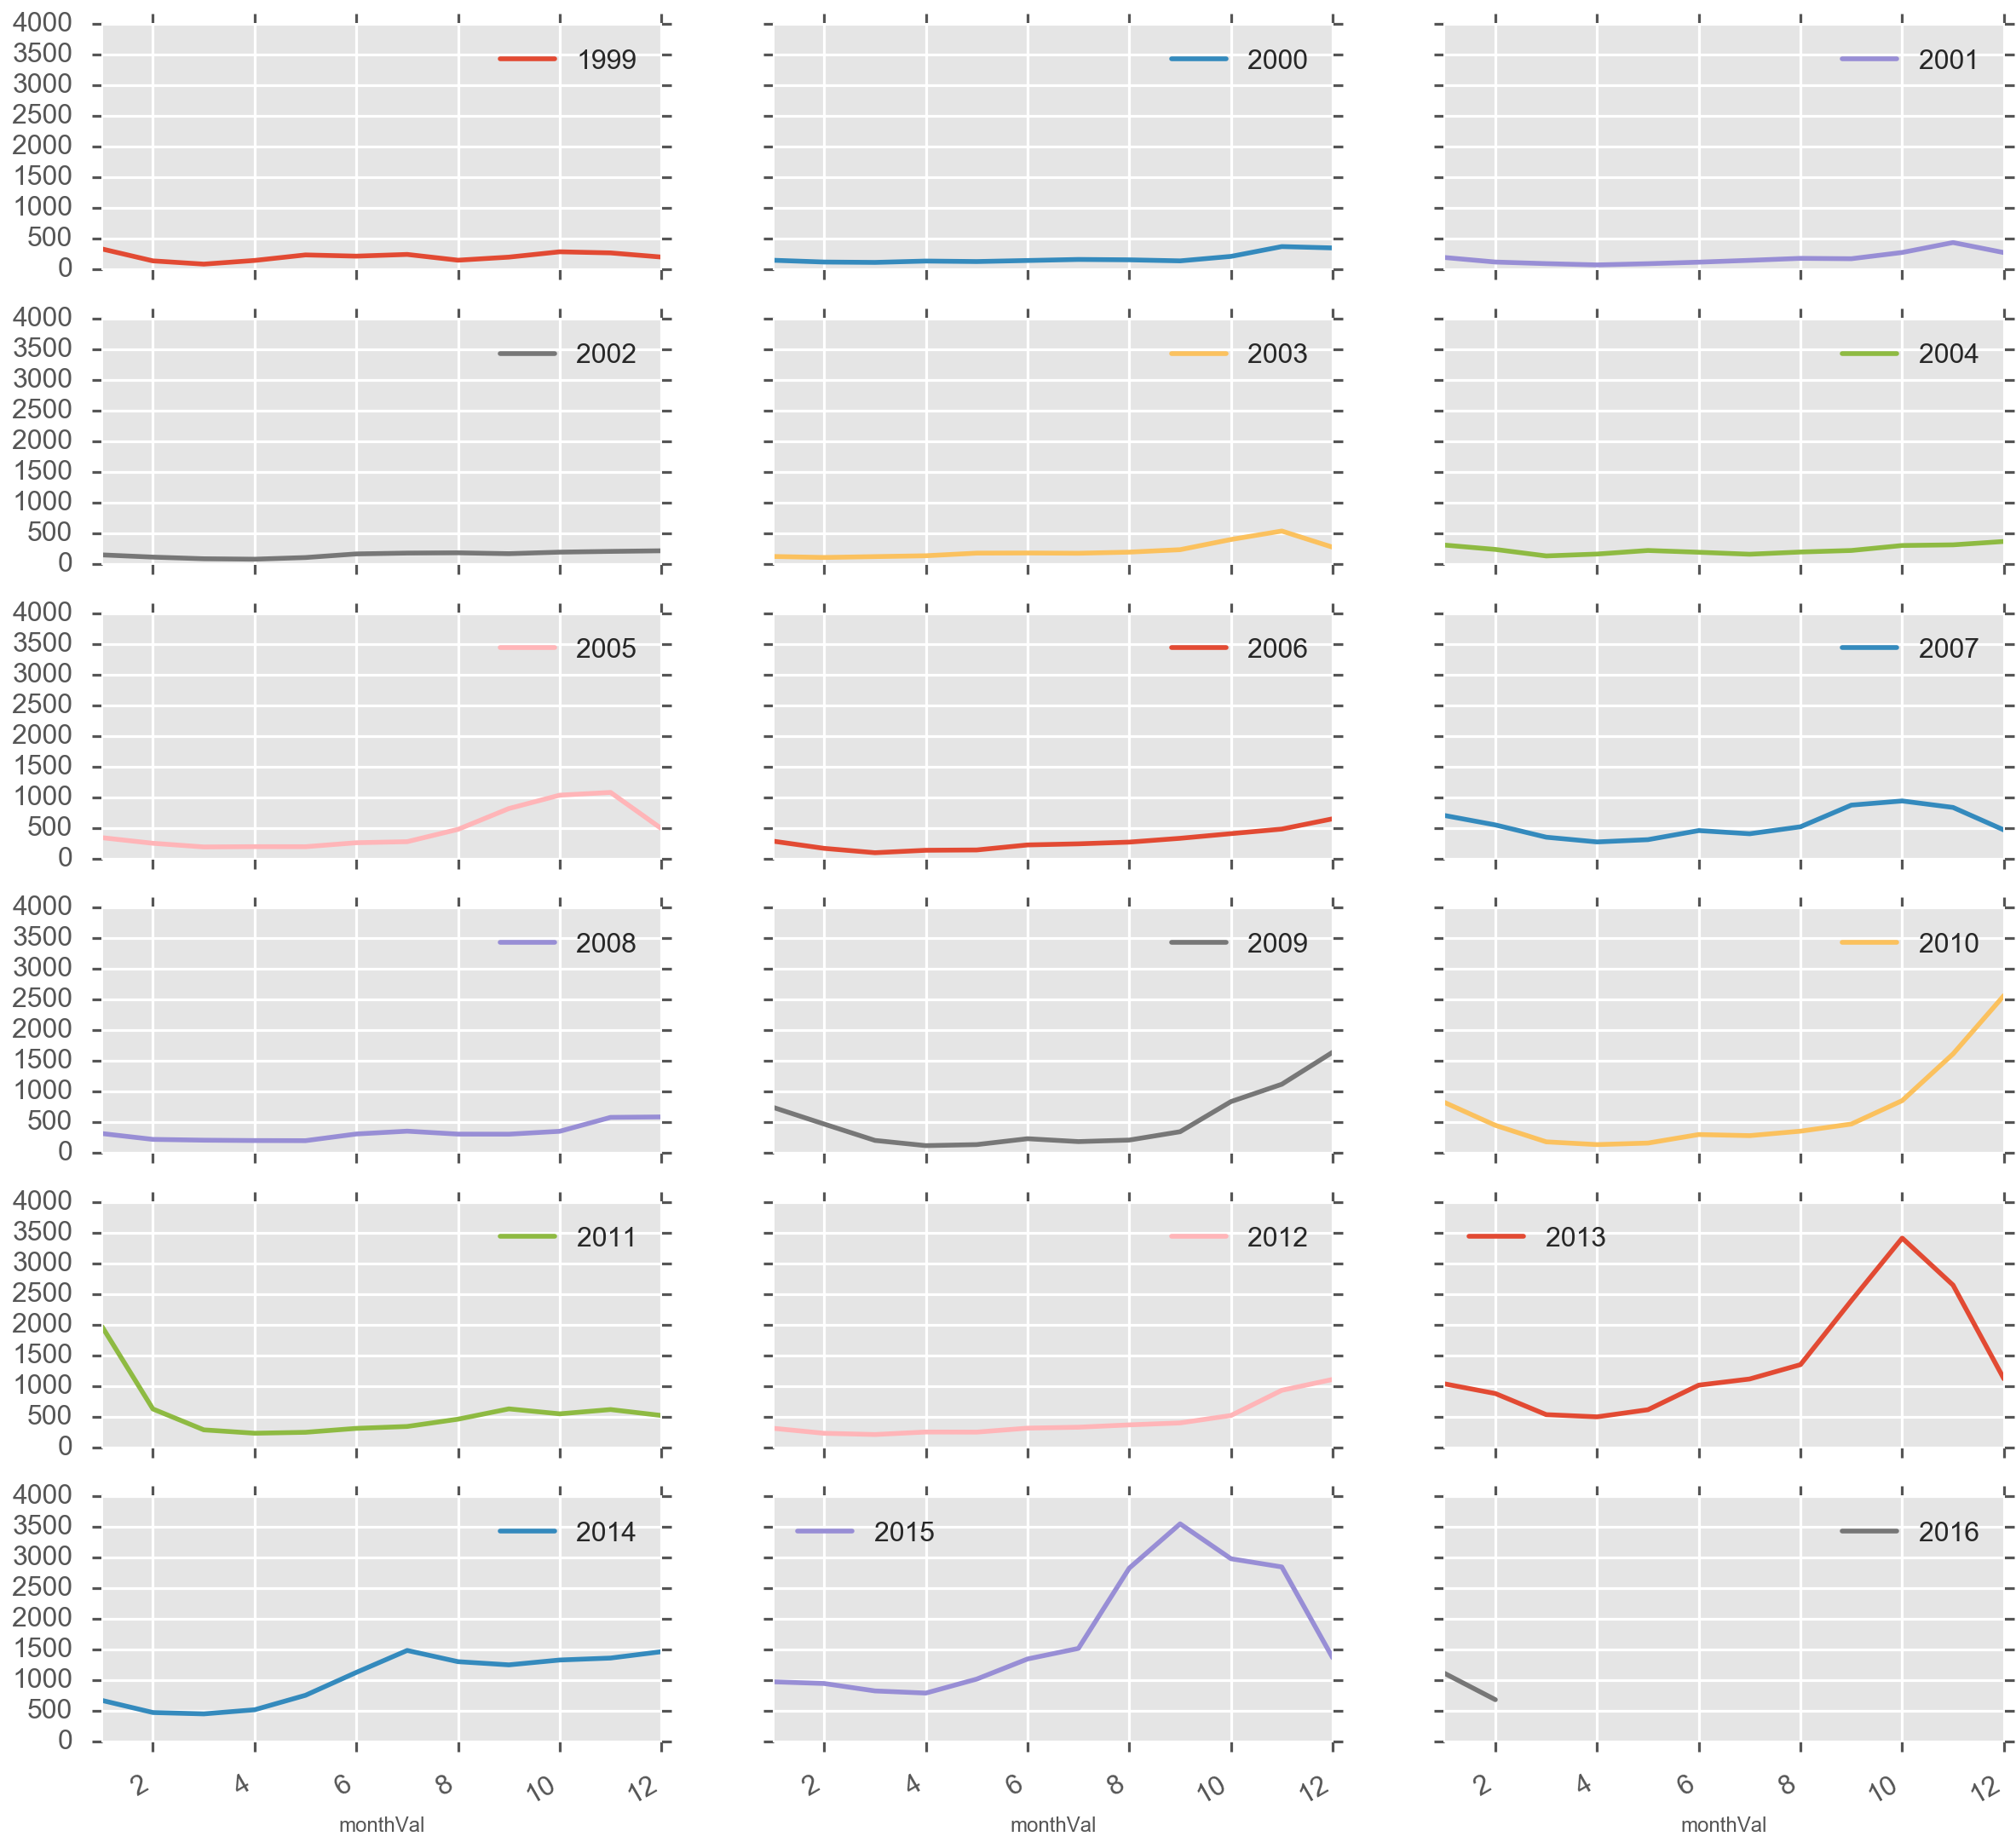

In [123]:
plt.rcParams['figure.figsize'] = (20, 20)
dfPunePivot.plot(subplots = True, layout=(6, 3), sharey=True)

##### One can notice the high price fluctuations at the end of the year in 2009, 2010, 2013, 2014 and 2015

## Modelling the Solution

In [124]:
#statsmodel libraries

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [125]:
dfPune.head()

market     month  year  quantity  priceMin  priceMax  priceMod  \
1999-01  PUNE(MS)   January  1999    261782       313       648       502   
1999-02  PUNE(MS)  February  1999    348353       238       379       321   
1999-03  PUNE(MS)     March  1999    353155       245       333       292   
1999-04  PUNE(MS)     April  1999    390826       252       400       354   
1999-05  PUNE(MS)       May  1999    403277       317       555       489   

        state  city       date  priceDiff  monthVal  
1999-01    MS  PUNE 1999-01-01        335         1  
1999-02    MS  PUNE 1999-02-01        141         2  
1999-03    MS  PUNE 1999-03-01         88         3  
1999-04    MS  PUNE 1999-04-01        148         4  
1999-05    MS  PUNE 1999-05-01        238         5

In [126]:
dfPune_bk = dfPune.copy()

In [127]:
dfPune = dfPune.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceDiff", "monthVal"], axis = 1)

In [128]:
dfPune.head()

quantity  priceMod       date
1999-01    261782       502 1999-01-01
1999-02    348353       321 1999-02-01
1999-03    353155       292 1999-03-01
1999-04    390826       354 1999-04-01
1999-05    403277       489 1999-05-01

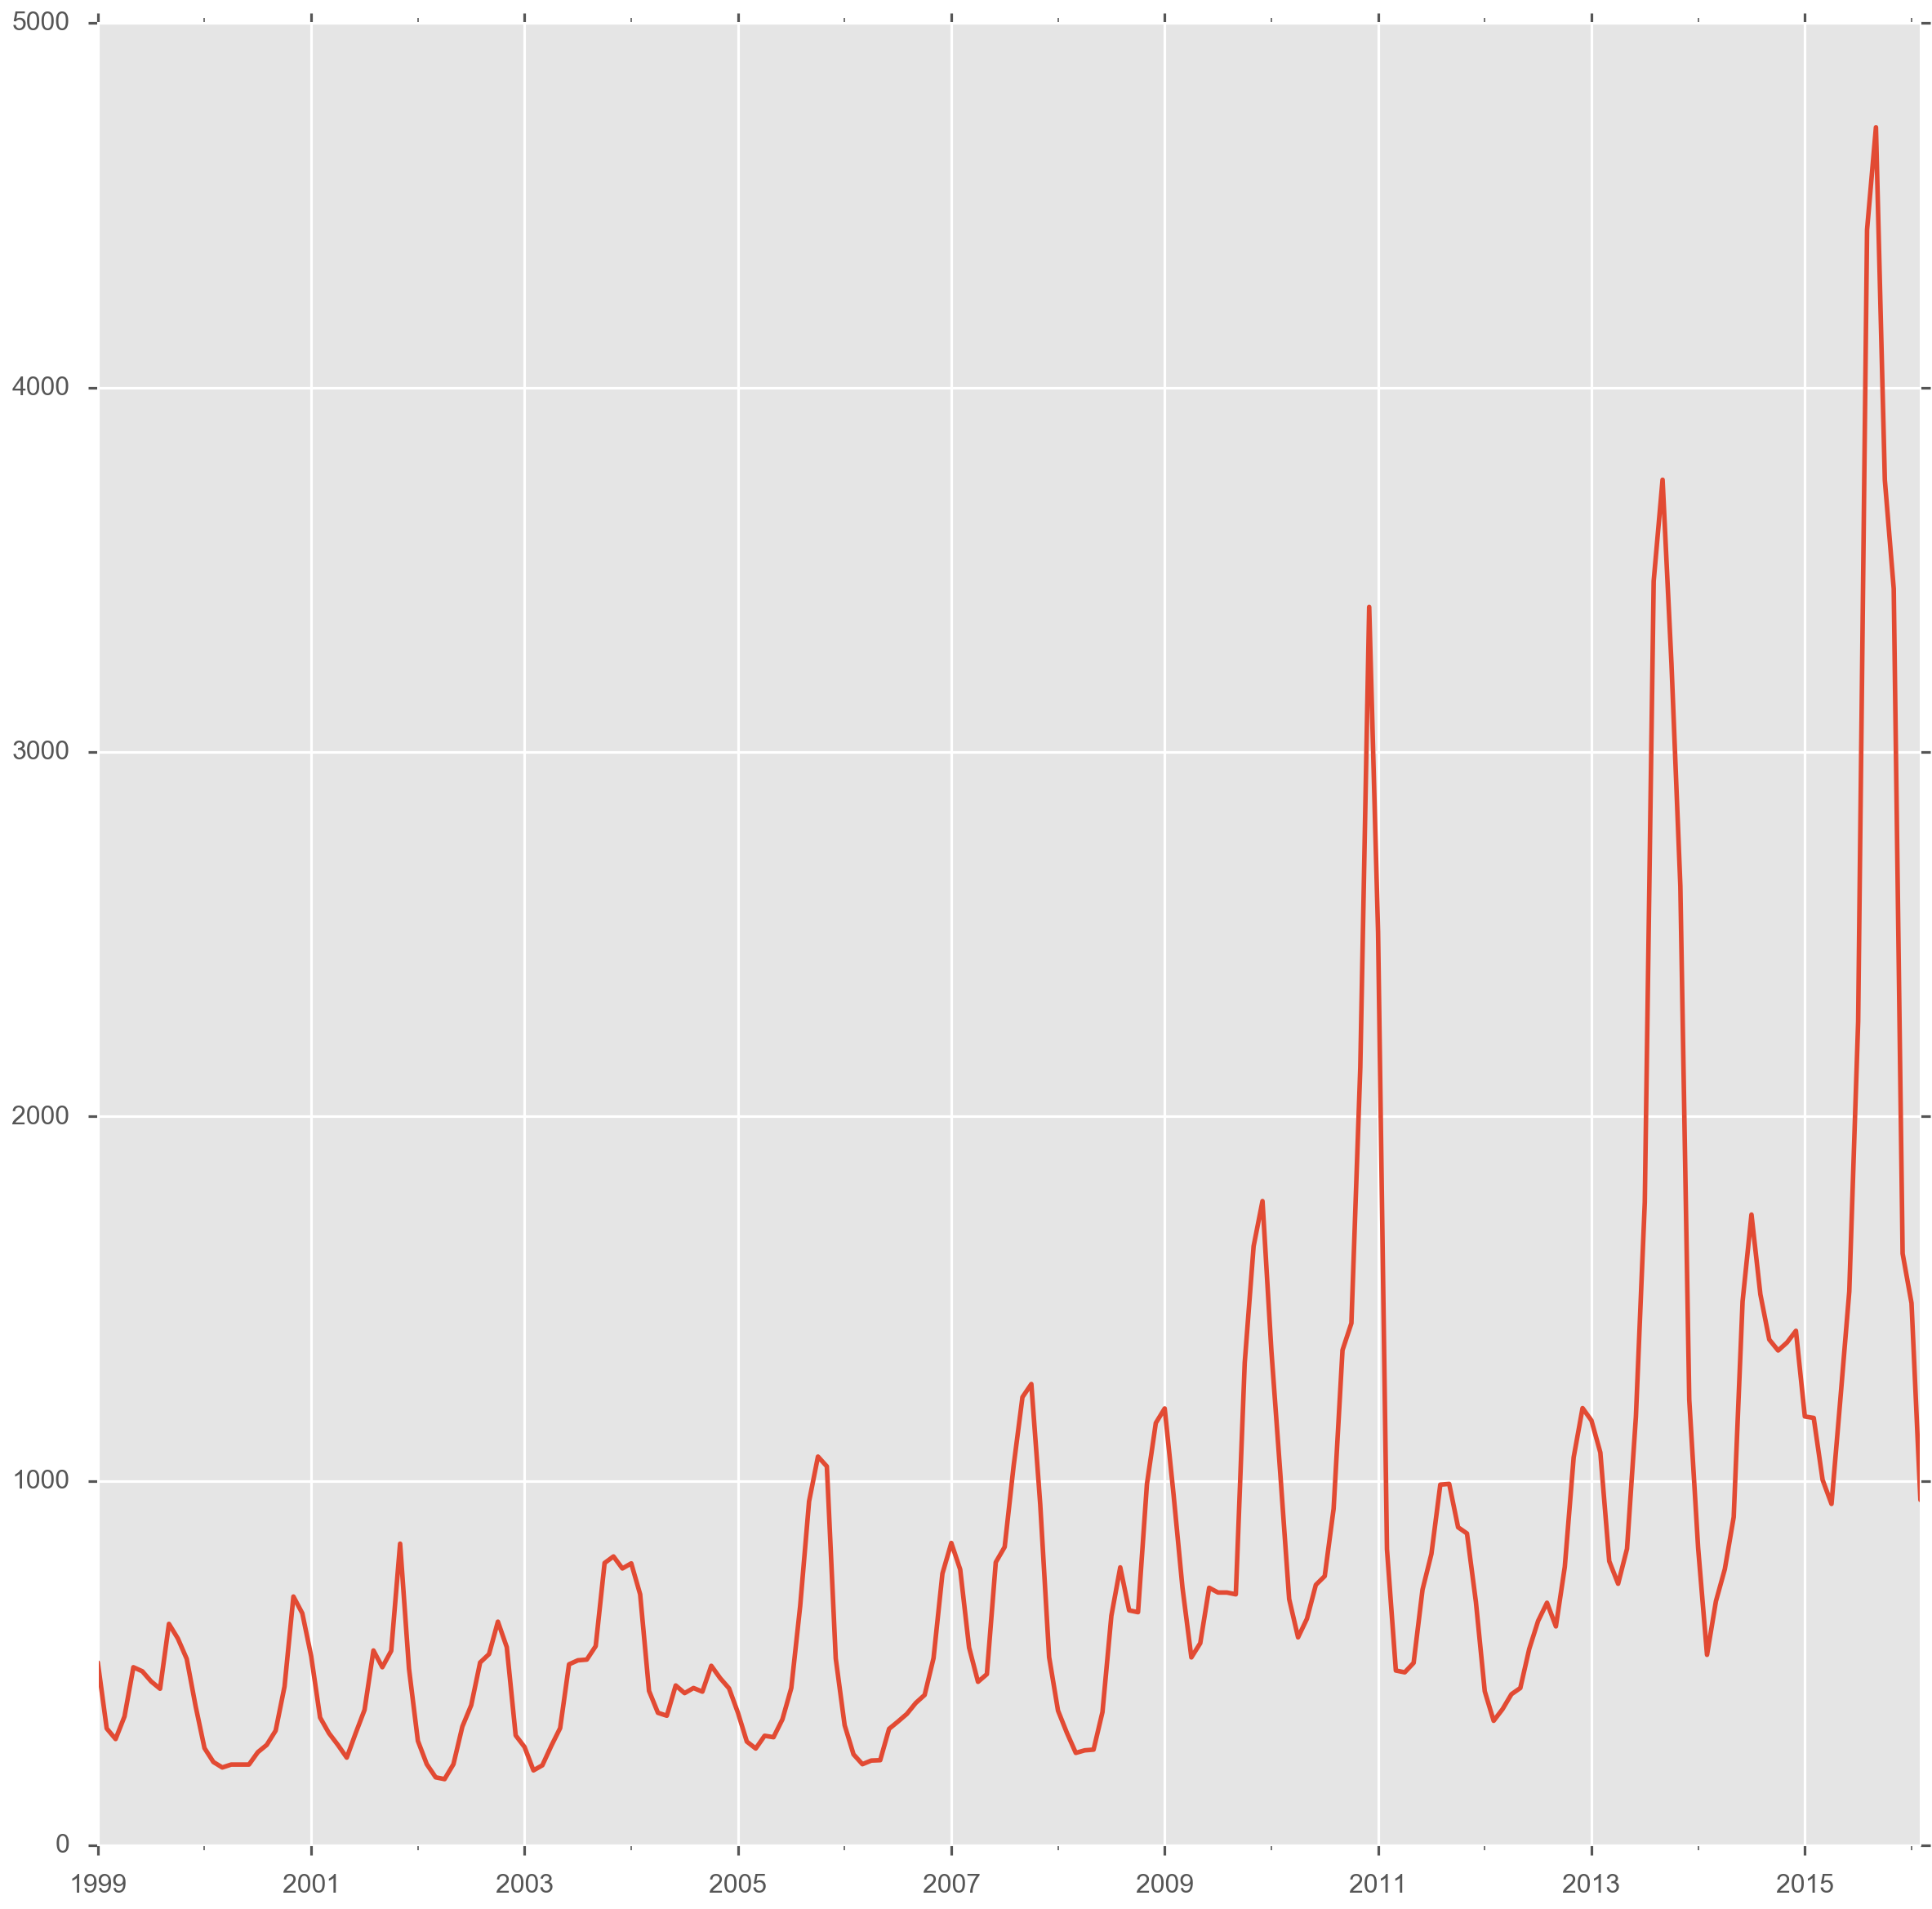

In [130]:
dfPune.priceMod.plot()

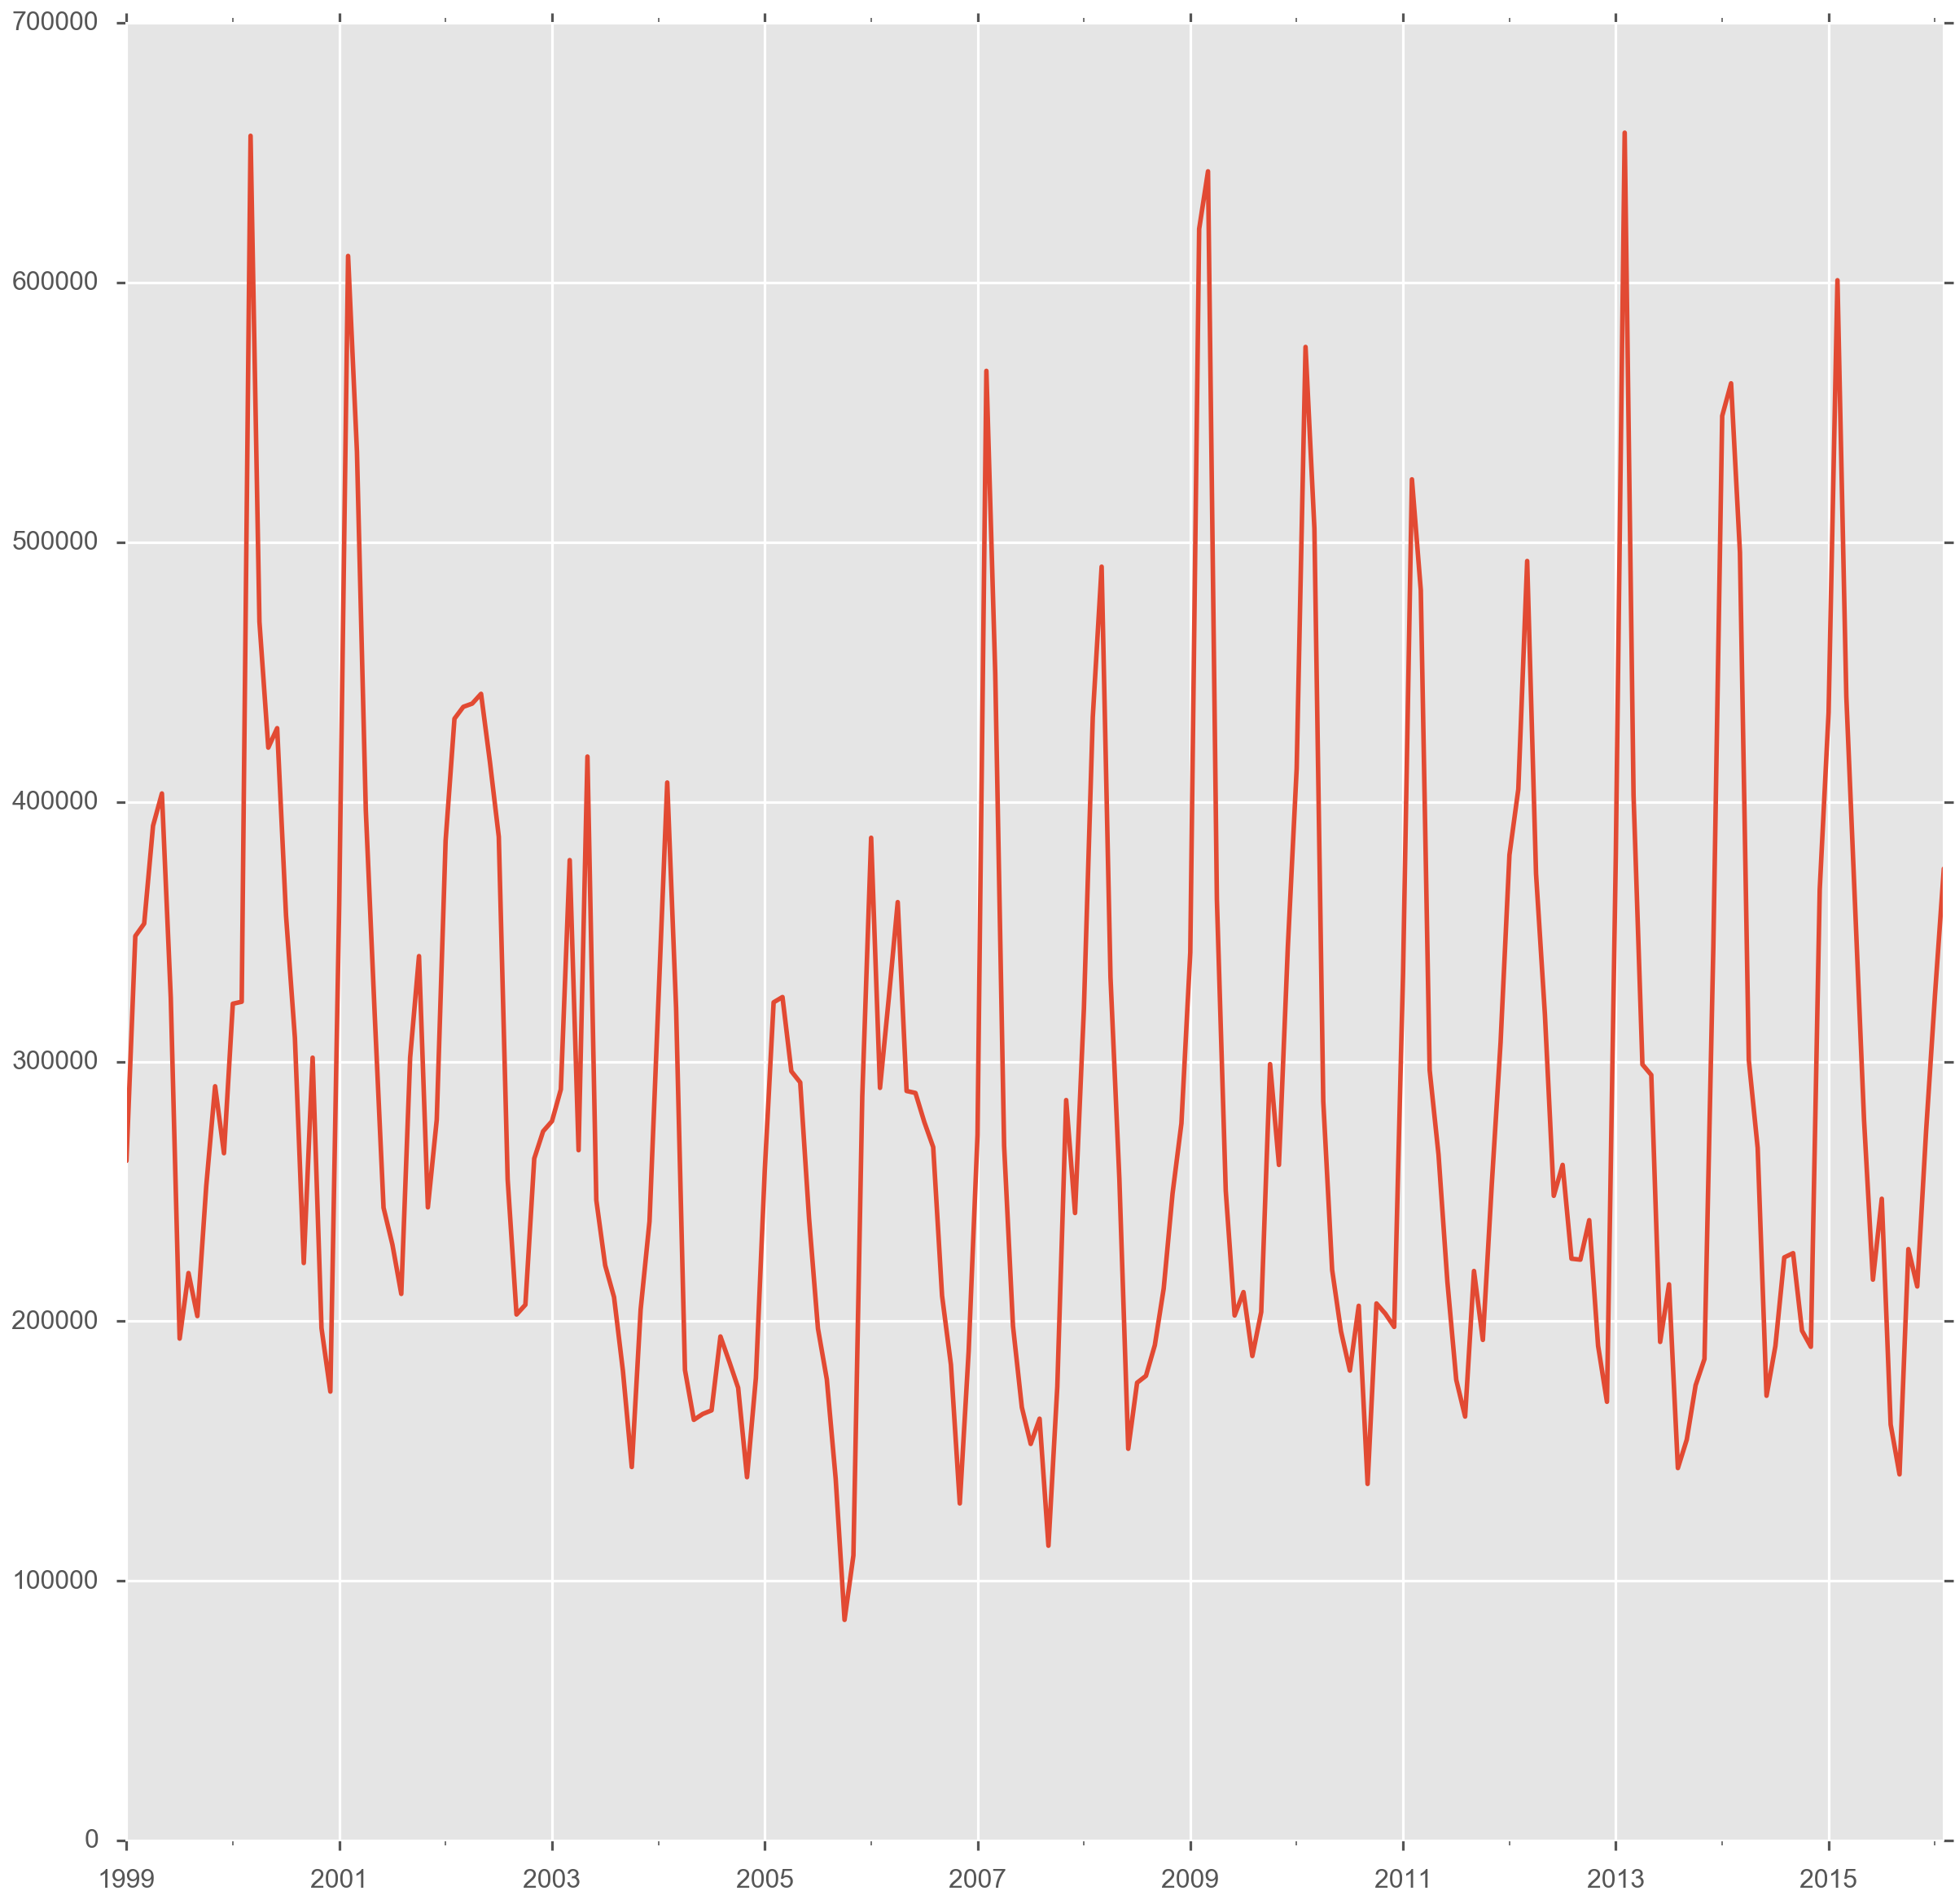

In [131]:
dfPune.quantity.plot()

### Transformation - Log

As discussed in the white paper, Transformations such as logarithms can help to stabilize the variance of a time series. 

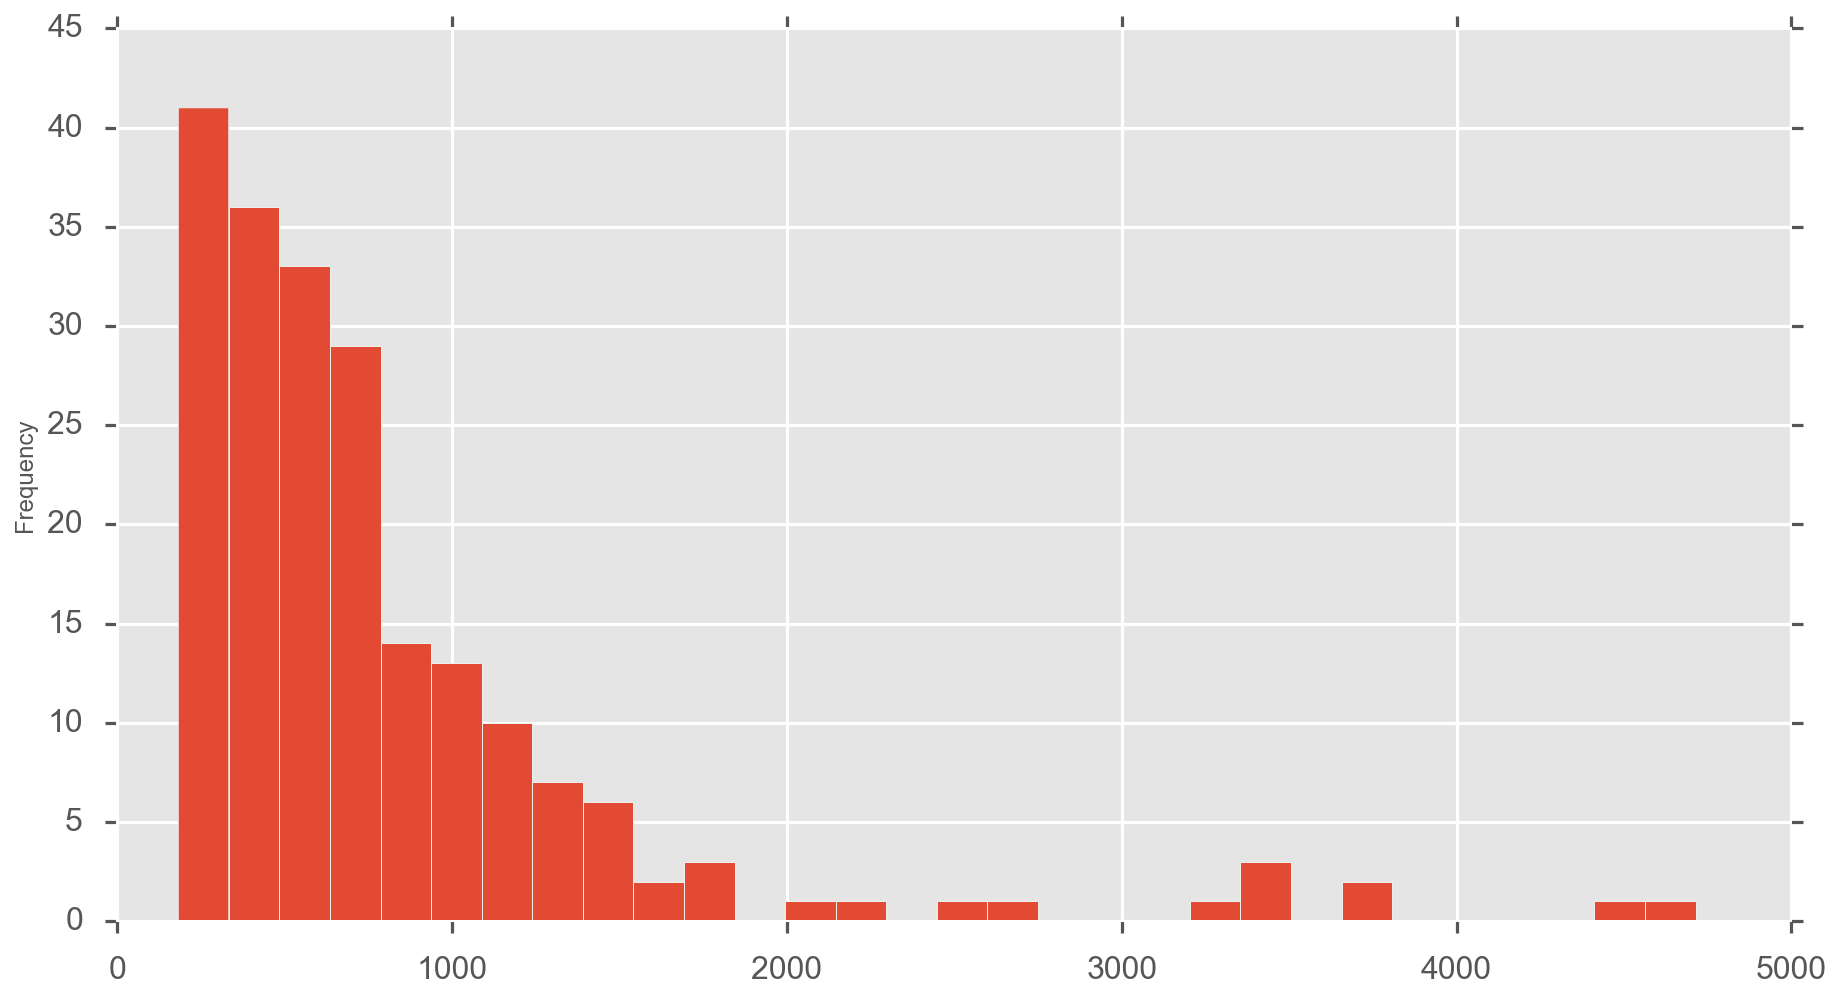

In [133]:
plt.rcParams['figure.figsize'] = (15, 8)

dfPune.priceMod.plot(kind = "hist", bins = 30)

#### As can be seen in the above graph, the distributions of variance does not follow a normal distribution and is all over the place. This makes the dataset non-stationary. Now we try applying the transformation(logarithm) on the original data and notice the resulting output.

In [135]:
dfPune['priceModLog'] = np.log(dfPune.priceMod)
dfPune.head()

quantity  priceMod       date  priceModLog
1999-01    261782       502 1999-01-01      6.21860
1999-02    348353       321 1999-02-01      5.77144
1999-03    353155       292 1999-03-01      5.67675
1999-04    390826       354 1999-04-01      5.86930
1999-05    403277       489 1999-05-01      6.19236

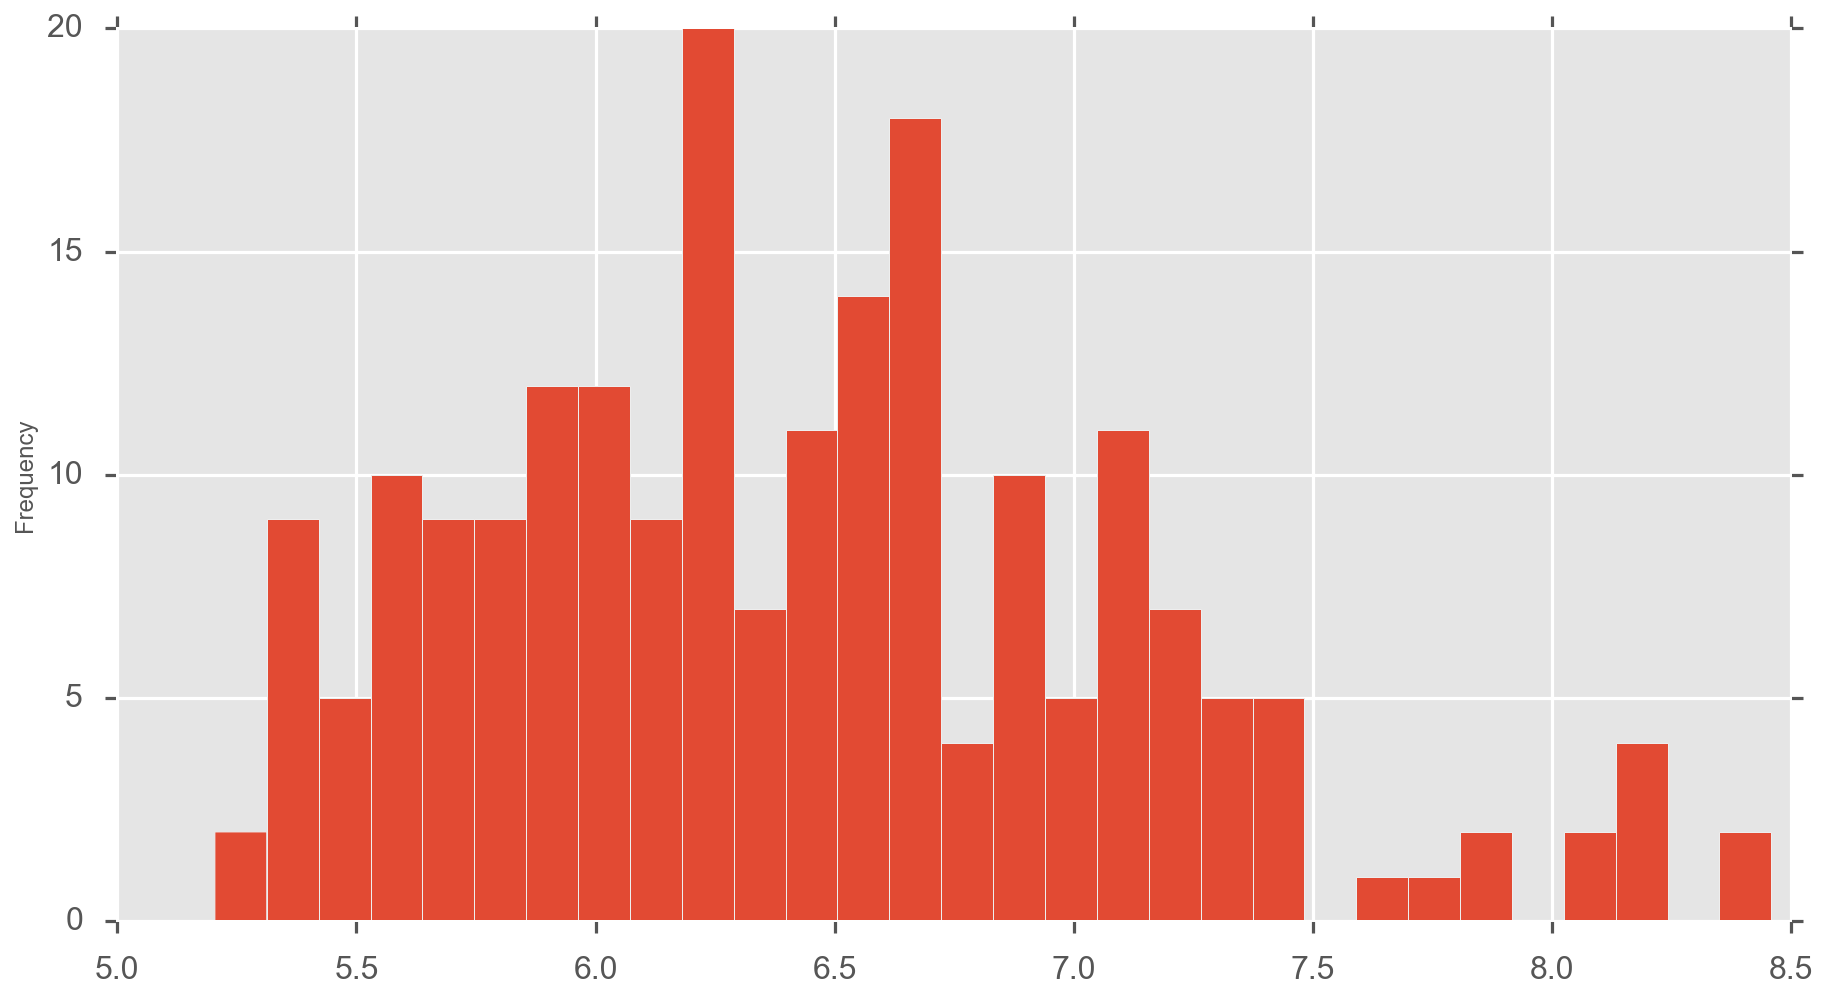

In [136]:
dfPune.priceModLog.plot(kind = "hist", bins = 30)

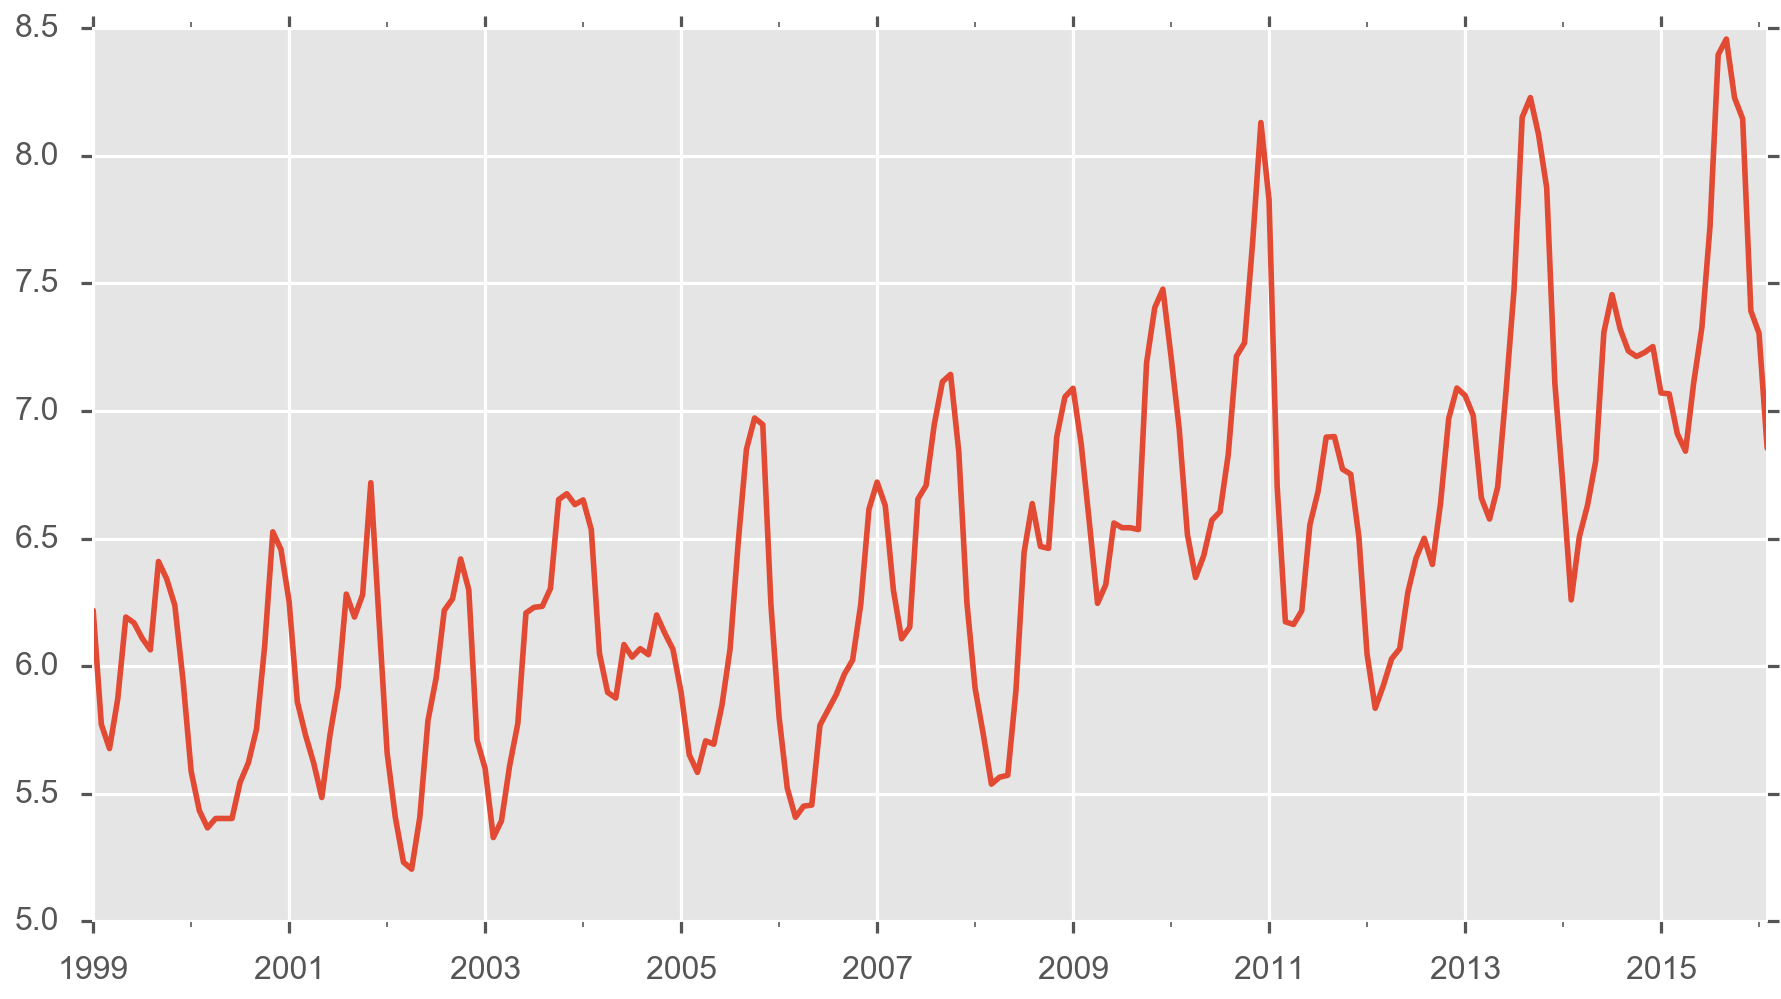

In [137]:
dfPune.priceModLog.plot()

## Simple Time Series Model

We will build a few simple time-series forecasting models to get a forecast on our dataset. Let us start with the three most basic models that we discussed in the White Paper. 
1. Average(Mean Constant) Model
2. Linear Trend Model
3. Random Walk Model

## Average  Model


In [140]:
model_mean_pred = dfPune.priceModLog.mean()
dfPune["priceMean"] = np.exp(model_mean_pred)

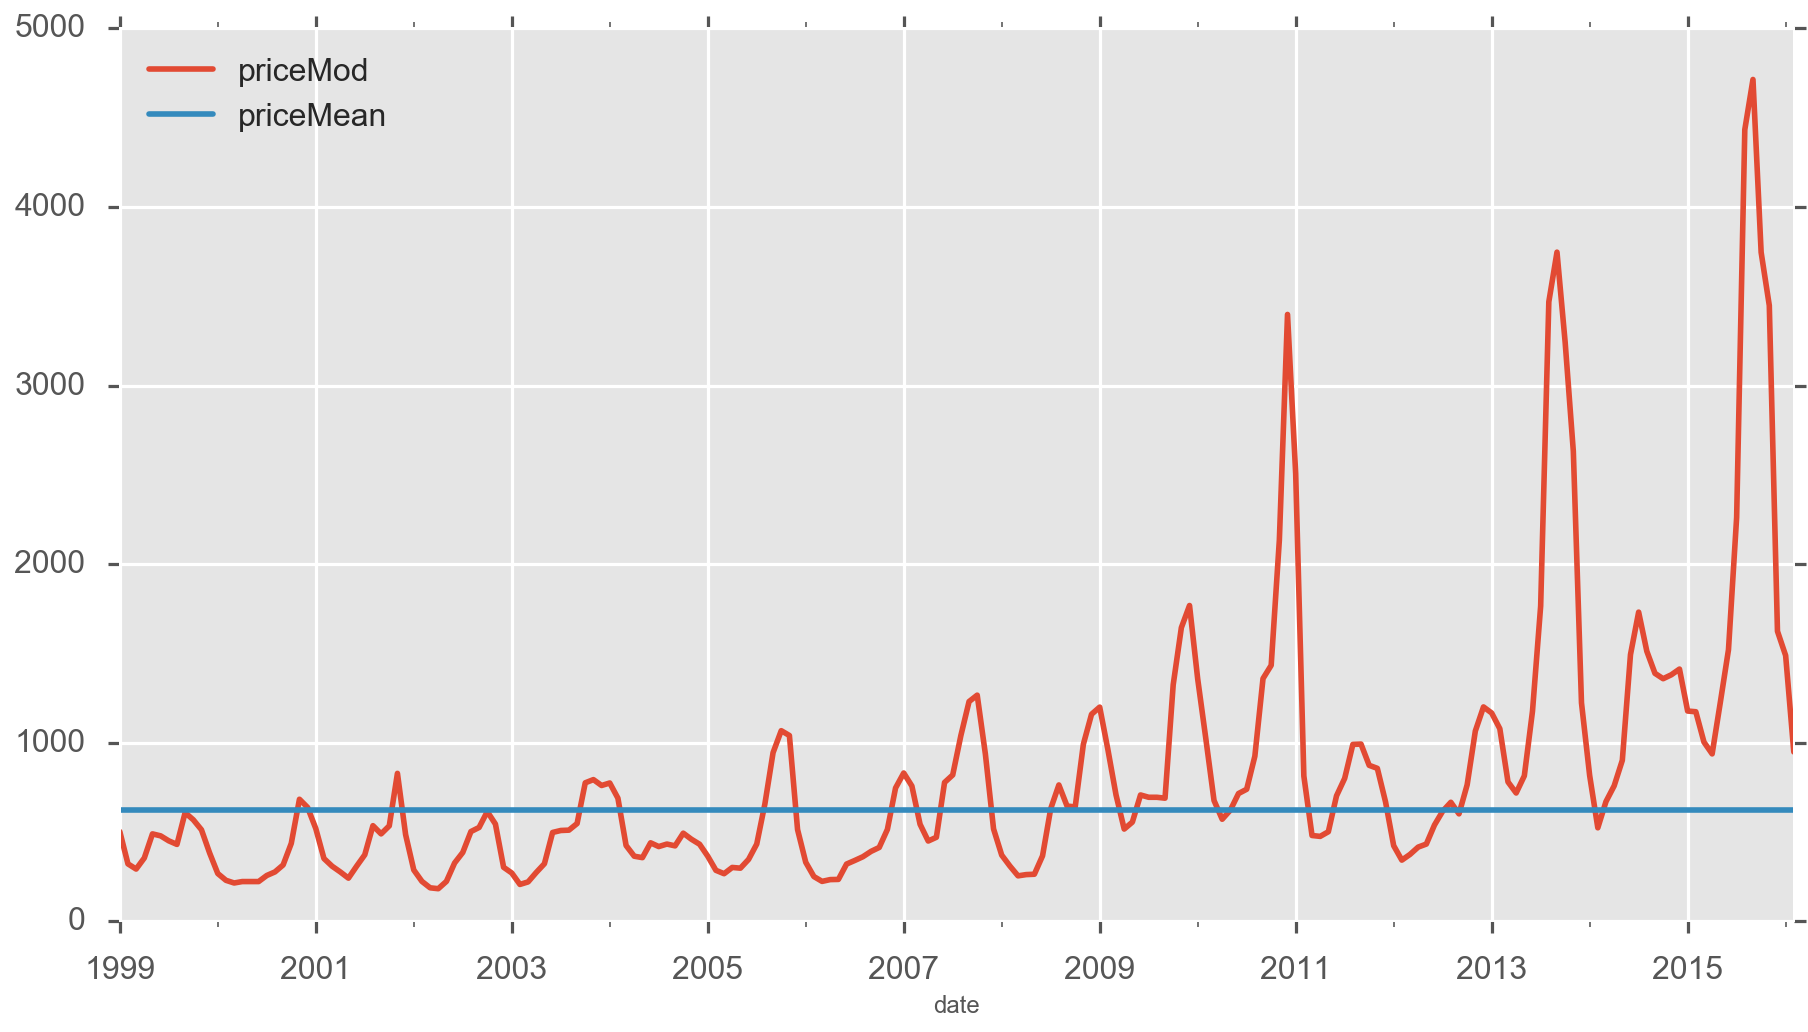

In [141]:
dfPune.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

We will use Root Mean Squared Error (RMSE) to calculate our error values

$RMSE = \Sigma \sqrt{ (\hat{y} - y)^2/n} $ , where $\hat{y}$ is  predicted value of y

In [143]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [145]:
model_mean_RMSE = RMSE(dfPune.priceMean, dfPune.priceMod)
model_mean_RMSE

768.34645077539221

## Linear Trend Model

Plot a linear trend model between priceModLog and time.

We will use a time index delta value instead of the actual dates in the linear trend model

In [154]:
dfPune["timeIndex"] = (dfPune.date - dfPune.date.min())/np.timedelta64(1, 'M')
#Timeindex colum will be a object of type timedelta in days # Then convert the value to months
dfPune["timeIndex"] = dfPune["timeIndex"].round(0).astype(int) #precision

In [155]:
dfPune.head()

quantity  priceMod       date  priceModLog  priceMean  timeIndex
1999-01    261782       502 1999-01-01      6.21860  622.97144          0
1999-02    348353       321 1999-02-01      5.77144  622.97144          1
1999-03    353155       292 1999-03-01      5.67675  622.97144          2
1999-04    390826       354 1999-04-01      5.86930  622.97144          3
1999-05    403277       489 1999-05-01      6.19236  622.97144          4

In [149]:
dfPune.dtypes

quantity                 int64
priceMod                 int64
date            datetime64[ns]
priceModLog            float64
priceMean              float64
timeIndex      timedelta64[ns]
dtype: object

In [158]:
## Now build linear regression between priceMod and timeIndex
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfPune).fit()

In [159]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           1.52e-30
Time:                        14:25:24   Log-Likelihood:                -147.21
No. Observations:                 206   AIC:                             298.4
Df Residuals:                     204   BIC:                             305.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6204      0.069     81.476      0.000       5.484       5.756
timeIndex      0.0079      0.001     13.644      0.000       0.007       0.009
==============================================================================
Omnibus:                        3.602   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.672
Skew:                           0.307   Prob(JB):                        0.159
Kurtosis:                       2.773   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
model_linear_pred = model_linear.predict()

In [161]:
model_linear_pred

array([ 5.62,  5.63,  5.64,  5.64,  5.65,  5.66,  5.67,  5.68,  5.68,
        5.69,  5.7 ,  5.71,  5.72,  5.72,  5.73,  5.74,  5.75,  5.76,
        5.76,  5.77,  5.78,  5.79,  5.8 ,  5.8 ,  5.81,  5.82,  5.83,
        5.83,  5.84,  5.85,  5.86,  5.87,  5.87,  5.88,  5.89,  5.9 ,
        5.91,  5.91,  5.92,  5.93,  5.94,  5.95,  5.95,  5.96,  5.97,
        5.98,  5.99,  5.99,  6.  ,  6.01,  6.02,  6.03,  6.03,  6.04,
        6.05,  6.06,  6.07,  6.07,  6.08,  6.09,  6.1 ,  6.1 ,  6.11,
        6.12,  6.13,  6.14,  6.14,  6.15,  6.16,  6.17,  6.18,  6.18,
        6.19,  6.2 ,  6.21,  6.22,  6.22,  6.23,  6.24,  6.25,  6.26,
        6.26,  6.27,  6.28,  6.29,  6.3 ,  6.3 ,  6.31,  6.32,  6.33,
        6.34,  6.34,  6.35,  6.36,  6.37,  6.37,  6.38,  6.39,  6.4 ,
        6.41,  6.41,  6.42,  6.43,  6.44,  6.45,  6.45,  6.46,  6.47,
        6.48,  6.49,  6.49,  6.5 ,  6.51,  6.52,  6.53,  6.53,  6.54,
        6.55,  6.56,  6.57,  6.57,  6.58,  6.59,  6.6 ,  6.61,  6.61,
        6.62,  6.63,

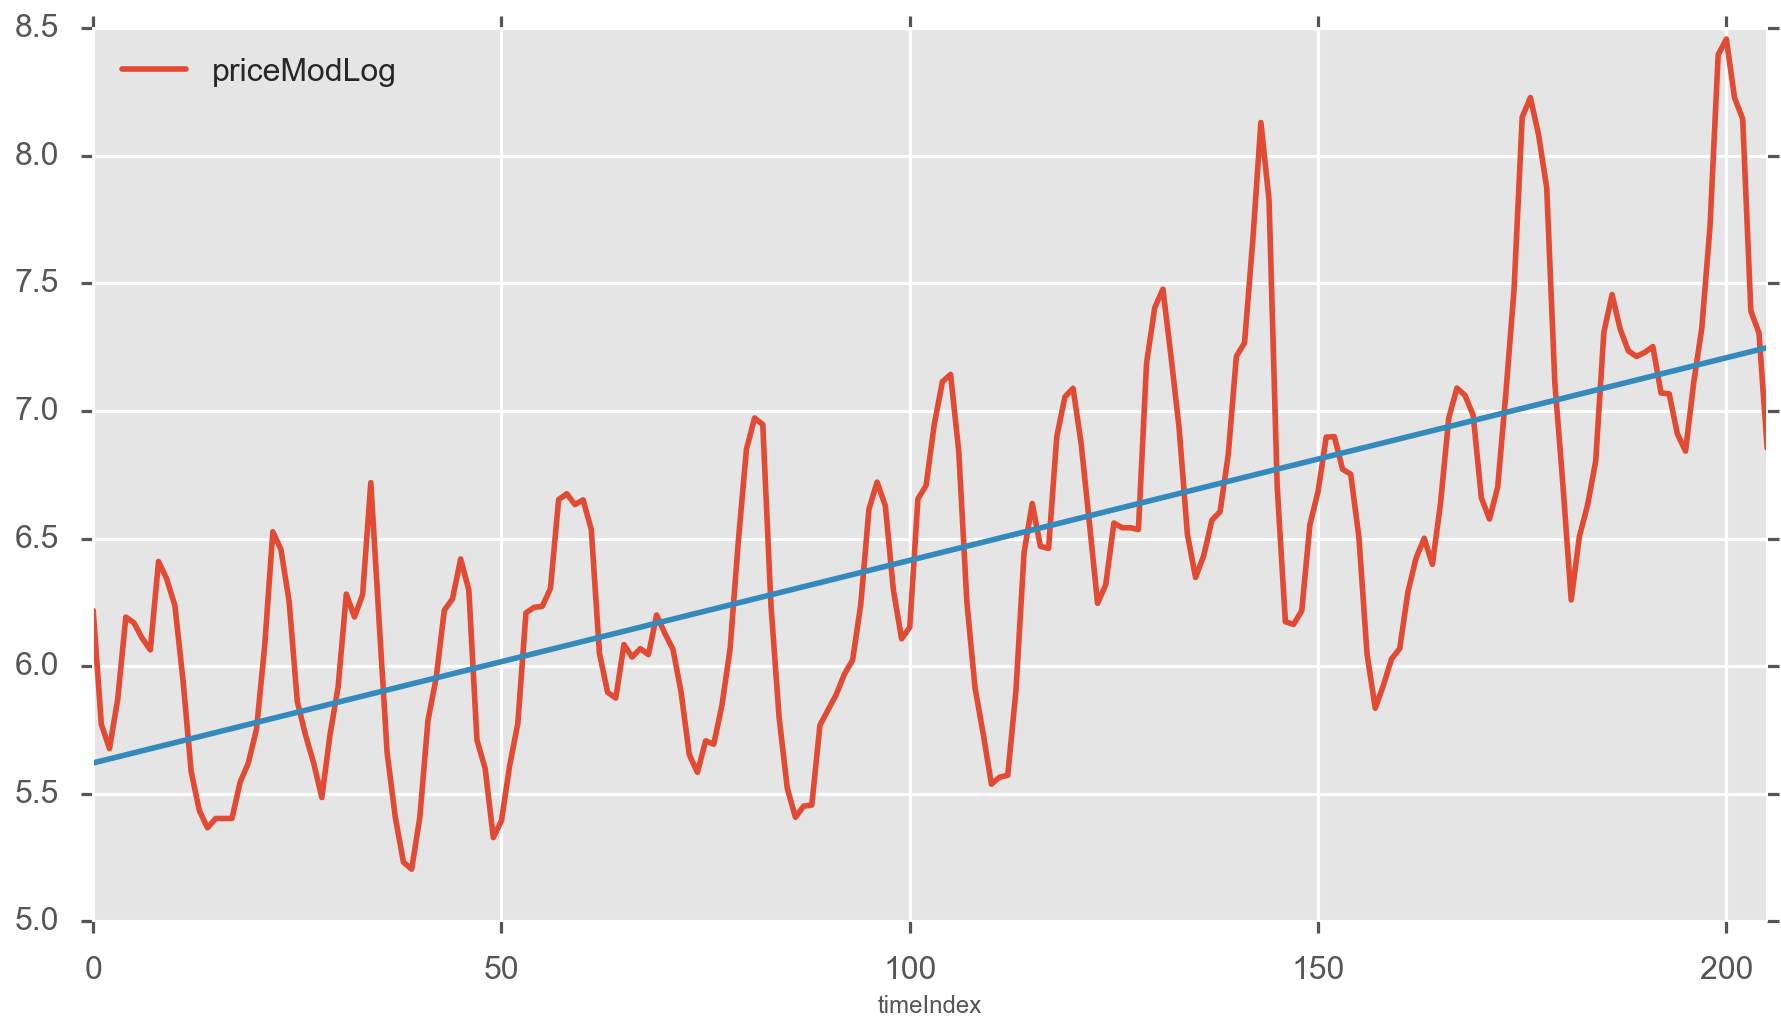

In [162]:
dfPune.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfPune.timeIndex,model_linear_pred, '-')

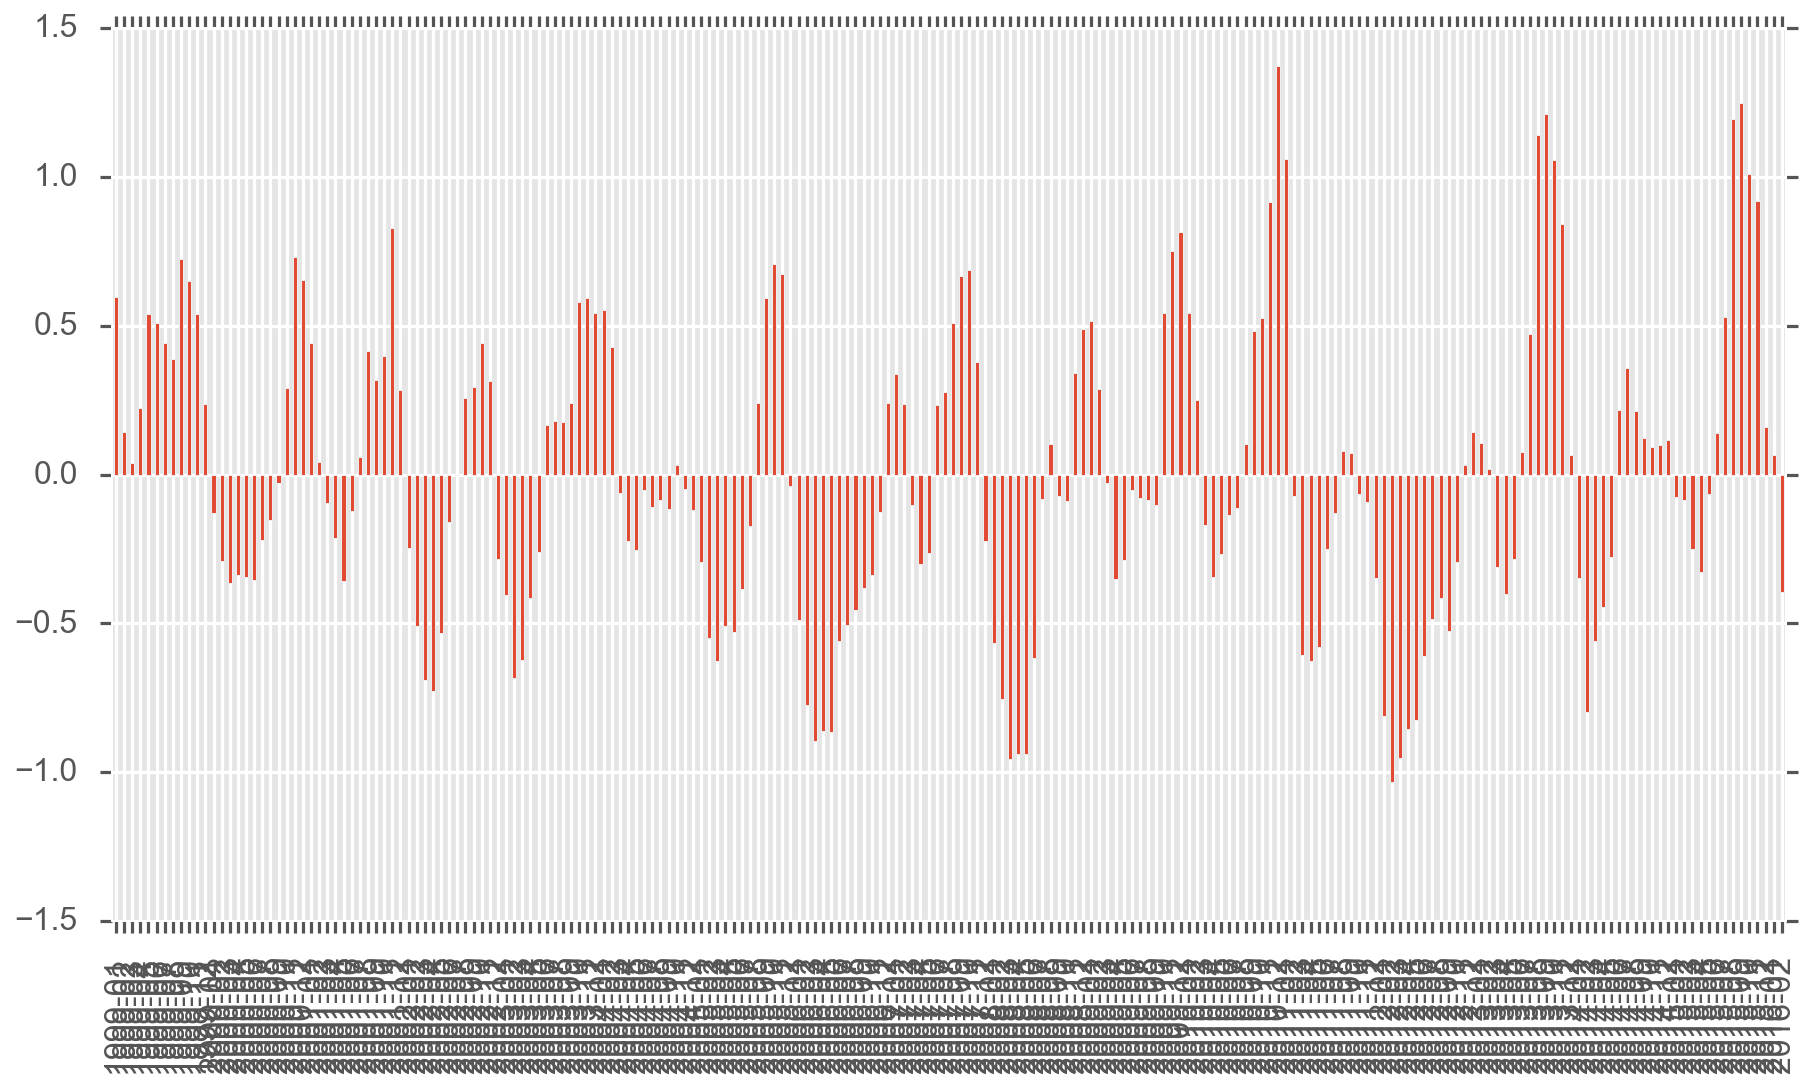

In [163]:
model_linear.resid.plot(kind = "bar")

##### We can notice a pattern in the error plot which should not exist if the model has extracted the signal from the data. In statistical terms it is called the  lag-1 autocorrelation.  If there is no time pattern in the data, the lag-1 autocorrelation should be very close to zero,

In [164]:
dfPune["priceLinear"] = np.exp(model_linear_pred)
dfPune.head()

quantity  priceMod       date  priceModLog  priceMean  timeIndex  \
1999-01    261782       502 1999-01-01      6.21860  622.97144          0   
1999-02    348353       321 1999-02-01      5.77144  622.97144          1   
1999-03    353155       292 1999-03-01      5.67675  622.97144          2   
1999-04    390826       354 1999-04-01      5.86930  622.97144          3   
1999-05    403277       489 1999-05-01      6.19236  622.97144          4   

         priceLinear  
1999-01    276.00014  
1999-02    278.20099  
1999-03    280.41938  
1999-04    282.65546  
1999-05    284.90937

In [166]:
# Root Mean Squared Error
model_linear_RMSE = RMSE(dfPune.priceLinear, dfPune.priceMod)
model_linear_RMSE

611.76993422566807

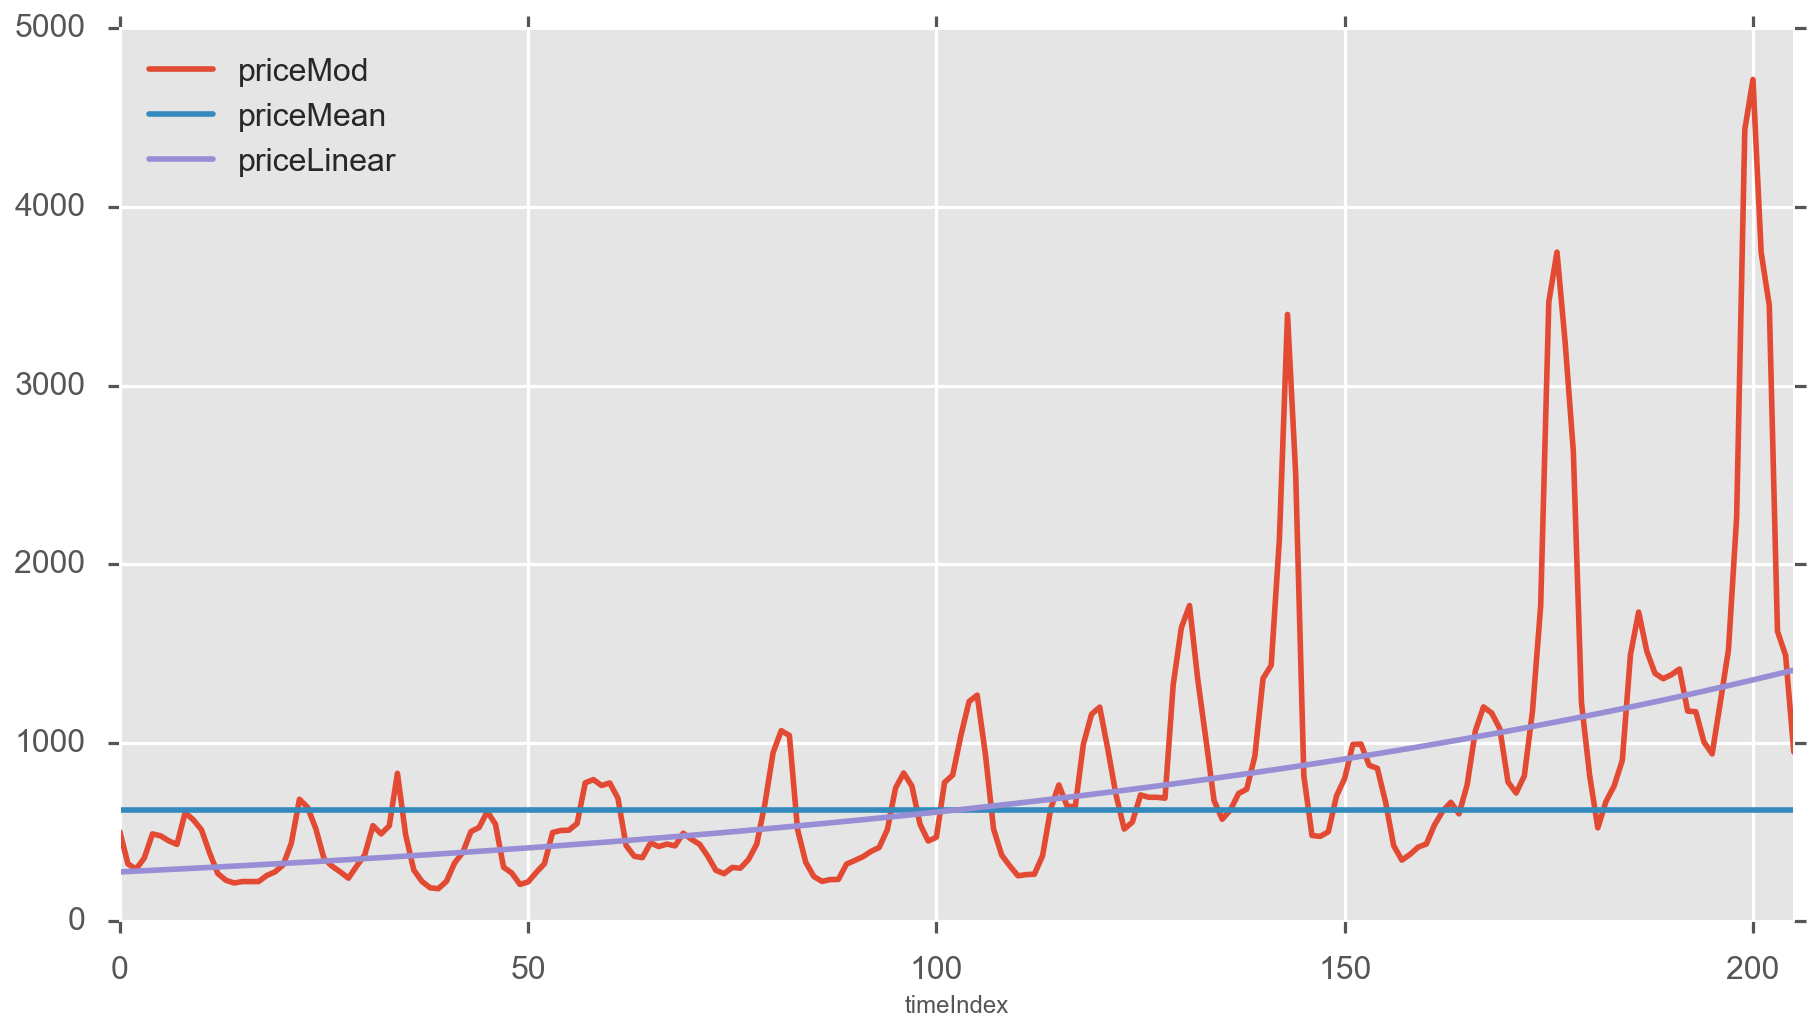

In [168]:
dfPune.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear"])

## Random Walk Model


In [169]:
dfPune["priceModLogShift1"] = dfPune.priceModLog.shift()

In [171]:
dfPune.head()

quantity  priceMod       date  priceModLog  priceMean  timeIndex  \
1999-01    261782       502 1999-01-01      6.21860  622.97144          0   
1999-02    348353       321 1999-02-01      5.77144  622.97144          1   
1999-03    353155       292 1999-03-01      5.67675  622.97144          2   
1999-04    390826       354 1999-04-01      5.86930  622.97144          3   
1999-05    403277       489 1999-05-01      6.19236  622.97144          4   

         priceLinear  priceModLogShift1  
1999-01    276.00014                nan  
1999-02    278.20099            6.21860  
1999-03    280.41938            5.77144  
1999-04    282.65546            5.67675  
1999-05    284.90937            5.86930

In [173]:
# Plotting the one-month difference curve
dfPune["priceModLogDiff"] = dfPune.priceModLog - dfPune.priceModLogShift1

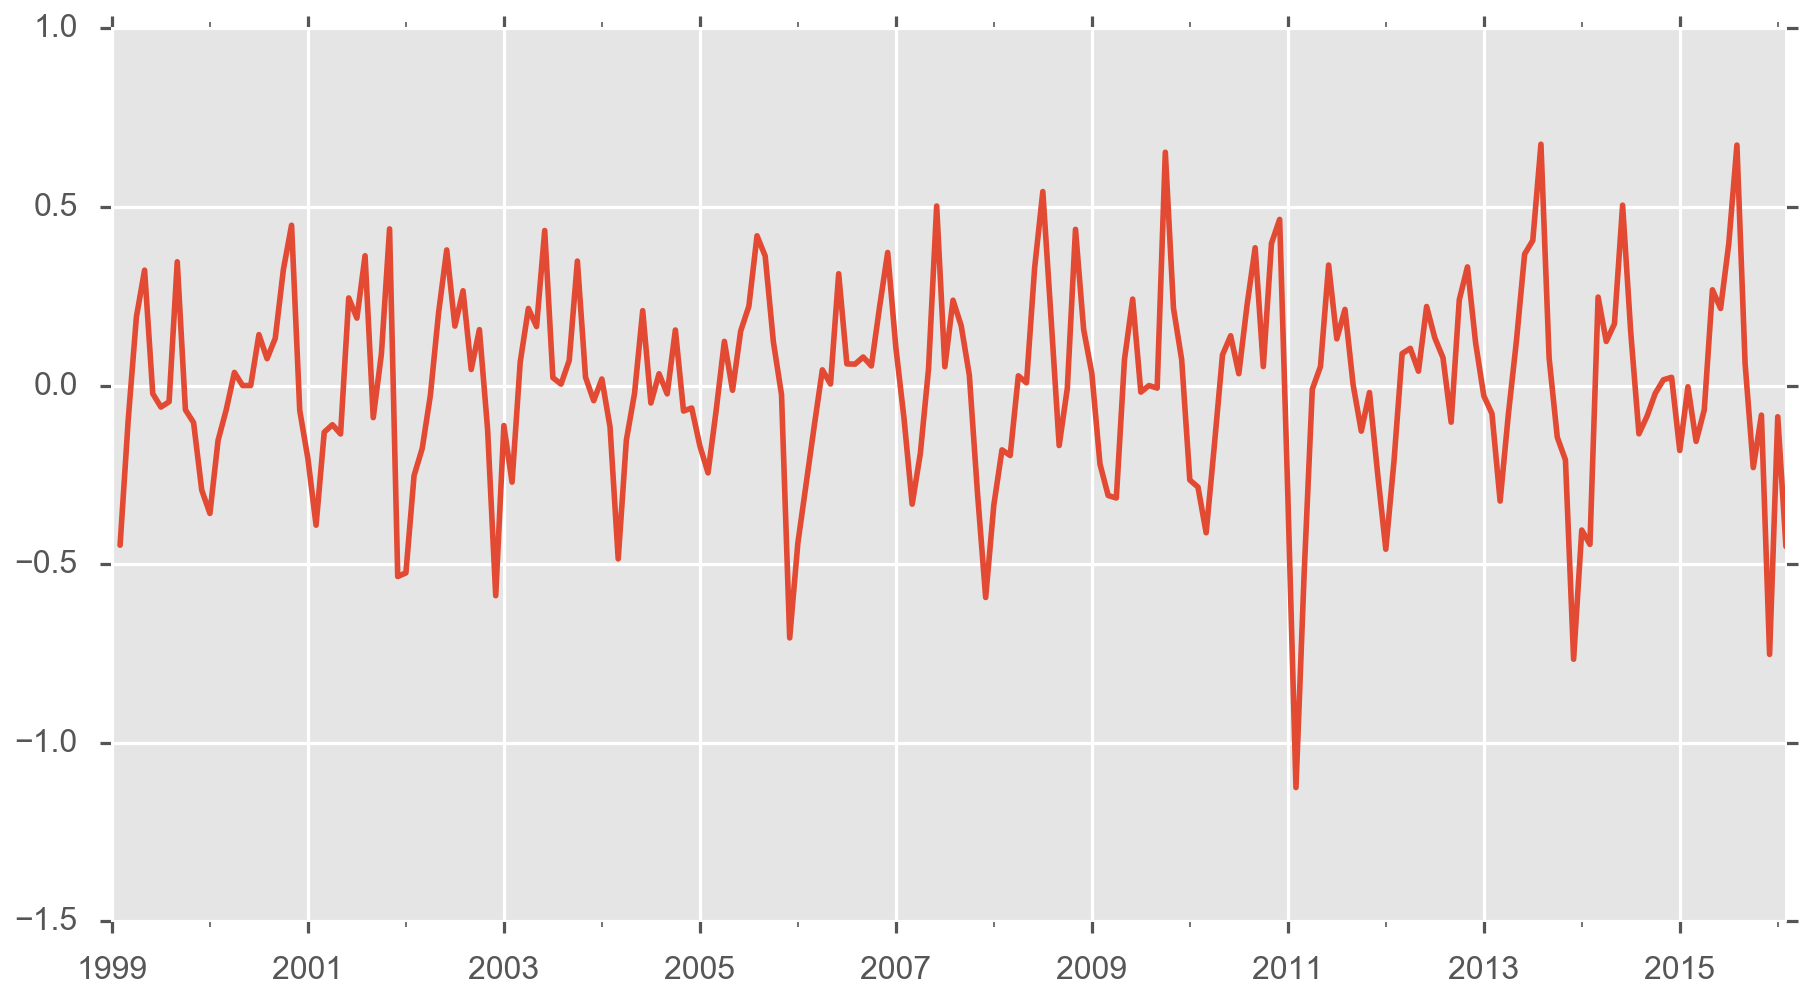

In [174]:
dfPune.priceModLogDiff.plot()

The plot looks stationary

In [175]:
dfPune["priceRandom"] = np.exp(dfPune.priceModLogShift1)
dfPune.head()

quantity  priceMod       date  priceModLog  priceMean  timeIndex  \
1999-01    261782       502 1999-01-01      6.21860  622.97144          0   
1999-02    348353       321 1999-02-01      5.77144  622.97144          1   
1999-03    353155       292 1999-03-01      5.67675  622.97144          2   
1999-04    390826       354 1999-04-01      5.86930  622.97144          3   
1999-05    403277       489 1999-05-01      6.19236  622.97144          4   

         priceLinear  priceModLogShift1  priceModLogDiff  priceRandom  
1999-01    276.00014                nan              nan          nan  
1999-02    278.20099            6.21860         -0.44716    502.00000  
1999-03    280.41938            5.77144         -0.09469    321.00000  
1999-04    282.65546            5.67675          0.19254    292.00000  
1999-05    284.90937            5.86930          0.32307    354.00000

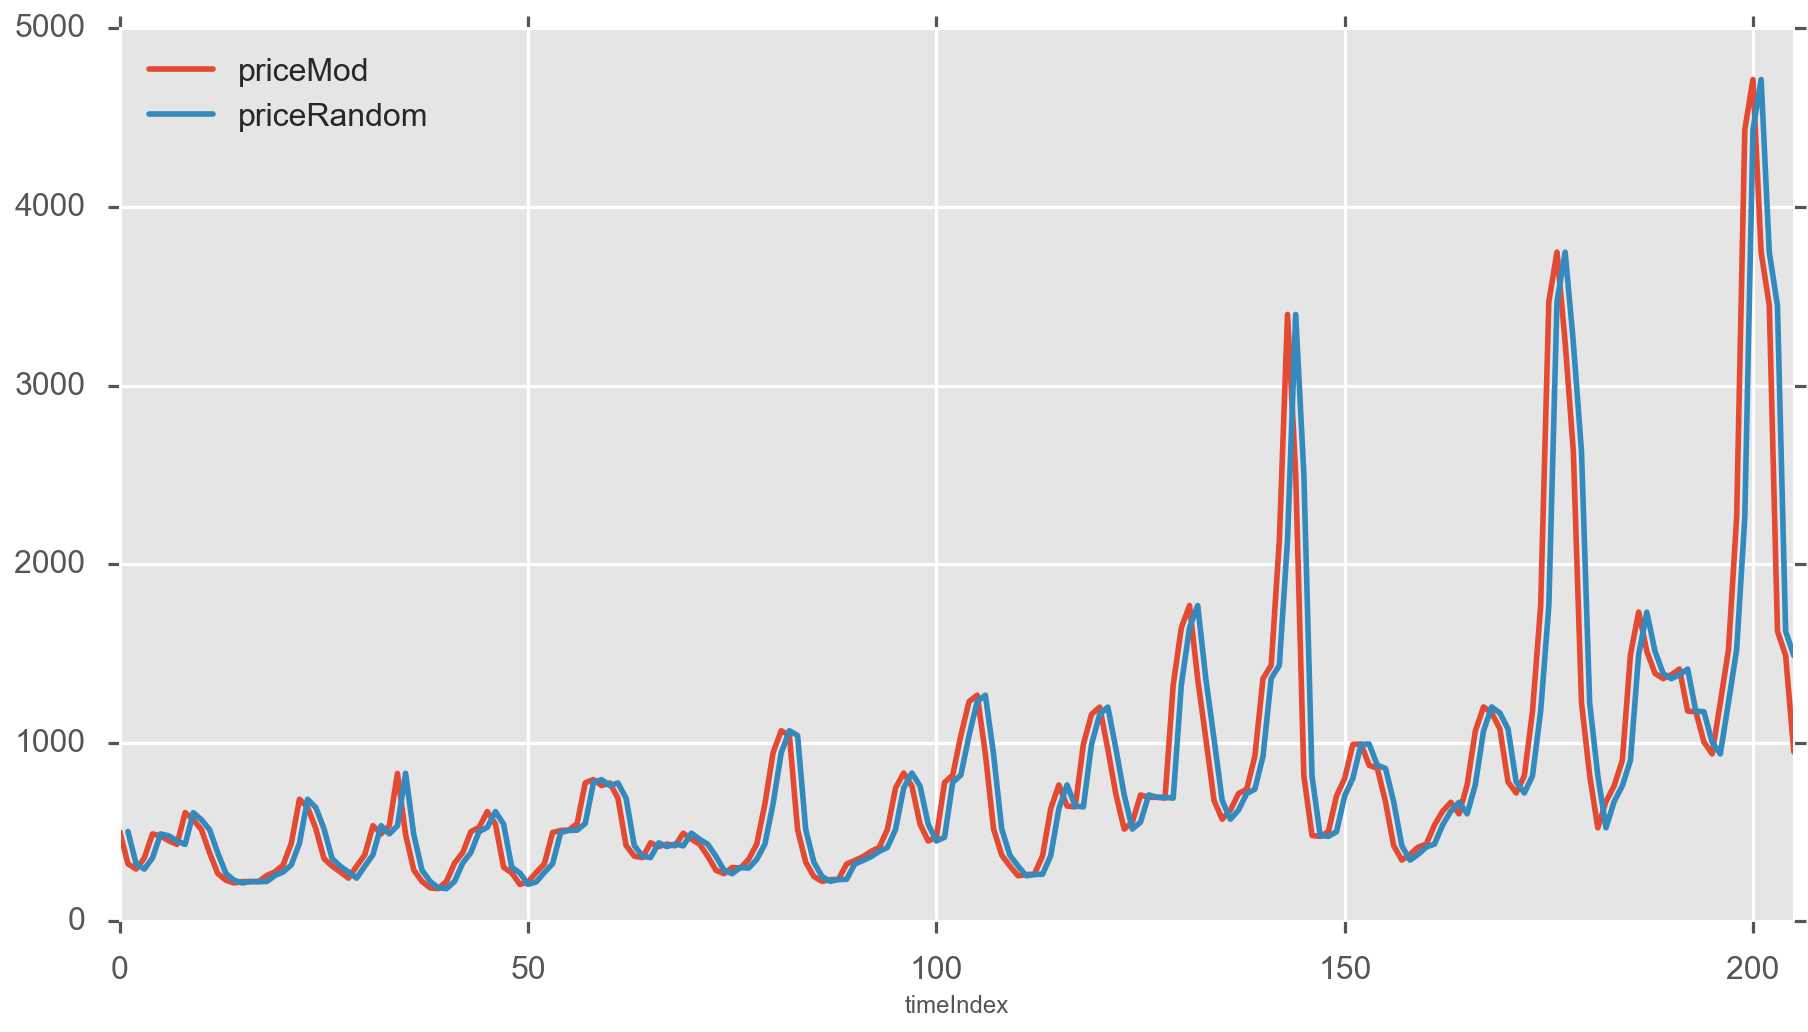

In [176]:
dfPune.plot(kind="line", x="timeIndex", y = ["priceMod","priceRandom"])

In [178]:
# Root Mean Squared Error (RMSE)
model_random_RMSE = RMSE(dfPune.priceRandom, dfPune.priceMod)
model_random_RMSE

363.1252421182183

### Plotting all the current models

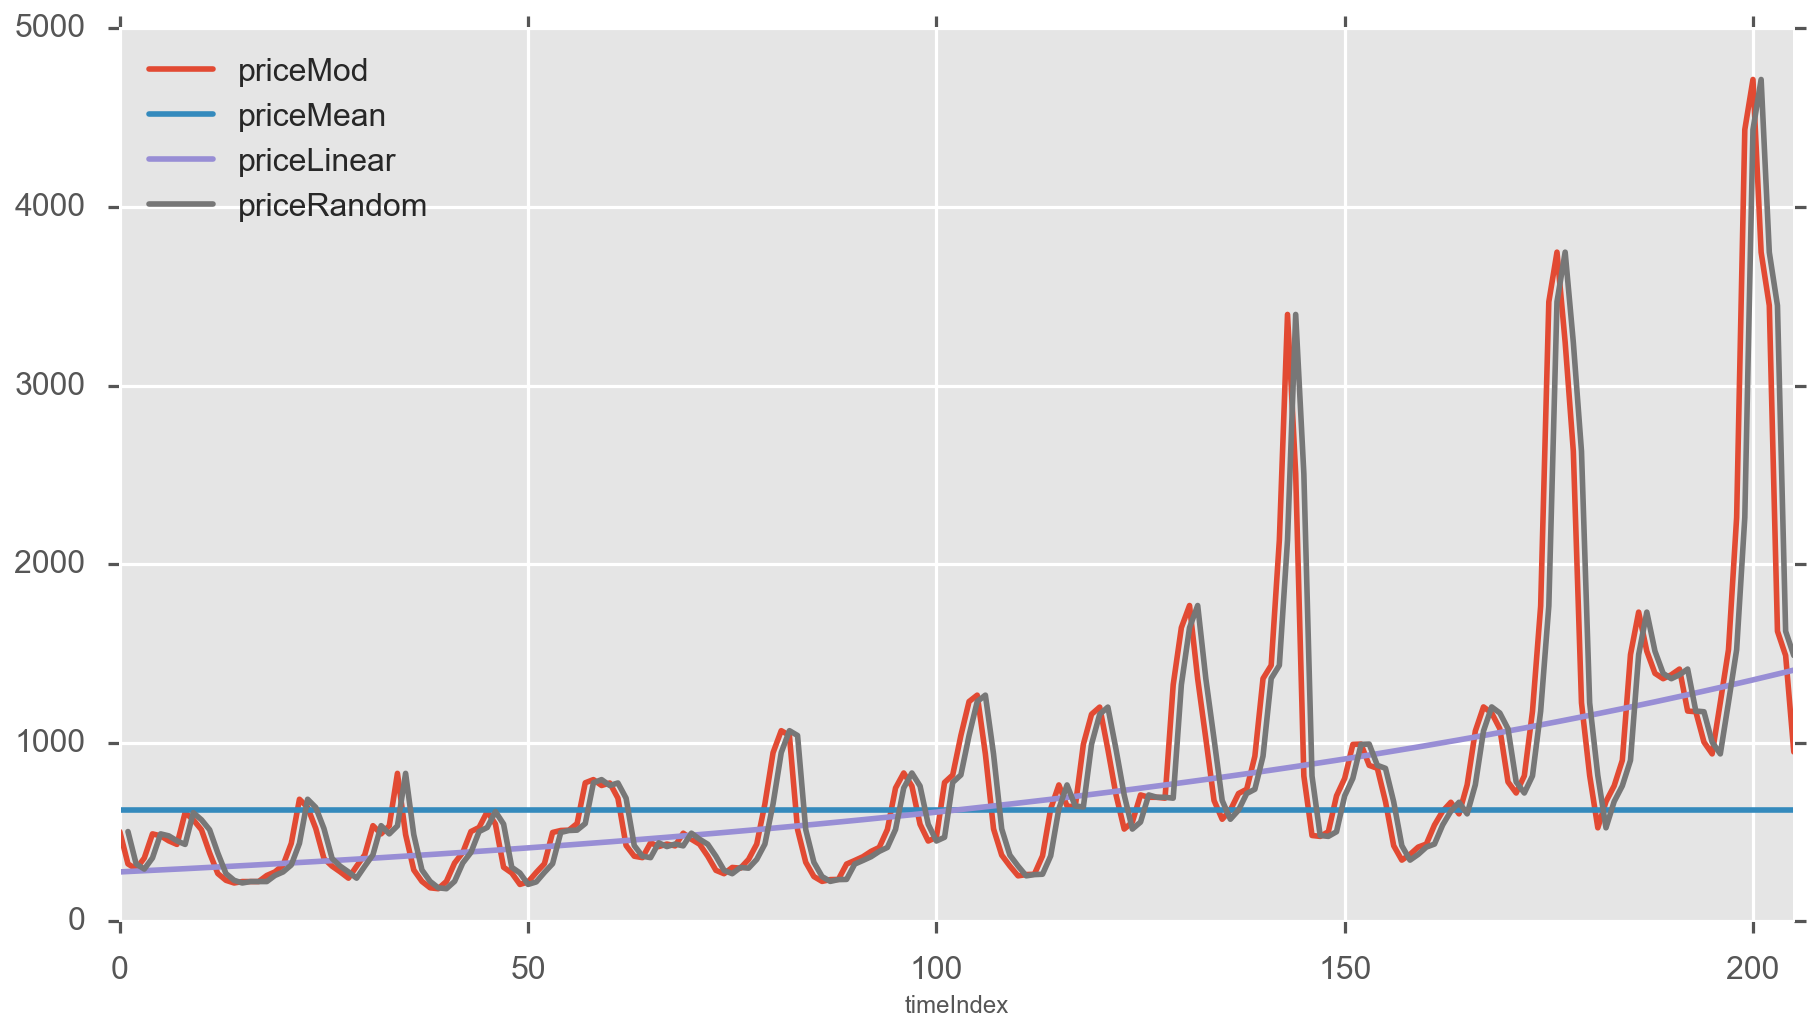

In [180]:
dfPune.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom"])

## Stationarity

### How do we check for Stationarity in a series? 

- **Plotting Rolling Statistics**: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
- **Dickey-Fuller Test**: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

###  Augmented Dickey Fuller Test of Stationarity

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

$$ Y_t = \rho * Y_{t-1} + \epsilon_t \\$$
$$  Y_t - Y_{t-1} = (\rho - 1) Y_{t - 1} + \epsilon_t \\$$

We have to test if p – 1 is significantly different than zero or not. If the null hypothesis gets rejected, we’ll get a stationary time series.

## Forecasting Steps 

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

## Estimating and Eliminating Trend

1. Transformation - Take a log, sqrt, cuberoot etc. transformation
2. Aggregation – taking average for a time period like monthly/weekly averages
3. Smoothing – taking rolling averages, exponential smoothing
4. Polynomial Fitting – fit a regression model

## Simple Moving Average 

The basic assumption behind averaging and smoothing models is that the time series is locally stationary with a slowly varying mean. Hence, we take a moving (local) average to estimate the current value of the mean and then use that as the forecast for the near future. This can be considered as a compromise between the mean model and the random-walk-without-drift-model. The same strategy can be used to estimate and extrapolate a local trend.  A moving average is often called a "smoothed" version of the original series because short-term averaging has the effect of smoothing out the bumps in the original series. By adjusting the degree of smoothing (the width of the moving average), we can hope to strike some kind of optimal balance between the performance of the mean and random walk models.

Simple Moving Average (SMA)

$$ \hat{y_t} = \frac{y_{t-1} + y_{t-2} + y_{t-3} + ... + y_{t-m}}{m} \\$$